In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)


# drive/"My Drive"/Colab_Notebooks/Word2Vec/simpsons_dataset.csv

In [0]:
#df = pd.read_csv('drive/My Drive/Colab_Notebooks/Word2Vec/Dataset/Human/Demian_Eng_Human_Translated.csv')
#df = pd.read_csv('drive/My Drive/Colab_Notebooks/Word2Vec/alice_in_wonderland.csv')
df_Human = pd.read_csv('drive/My Drive/Colab_Notebooks/Word2Vec/Dataset/Human/Demian_Eng_Human_Translated.csv', encoding='cp1252')
df_DeepL = pd.read_csv('drive/My Drive/Colab_Notebooks/Word2Vec/Dataset/DeepL/Demian_Eng_DeepL_Translated.csv', encoding='cp1252')
df_Google = pd.read_csv('drive/My Drive/Colab_Notebooks/Word2Vec/Dataset/Google/Demian_Eng_Google_Translated.csv', encoding='cp1252')
df_Microsoft = pd.read_csv('drive/My Drive/Colab_Notebooks/Word2Vec/Dataset/Microsoft/Demian_Eng_Microsoft_Translated.csv', encoding='cp1252')
df_Papago = pd.read_csv('drive/My Drive/Colab_Notebooks/Word2Vec/Dataset/Papago/Demian_Eng_Papago_Translated.csv', encoding='cp1252')

df_Original = pd.read_csv('drive/My Drive/Colab_Notebooks/Word2Vec/Dataset/Demian_Ger_Original.csv', encoding='cp1252')

# df_Human = pd.read_csv('drive/My Drive/Colab_Notebooks/Word2Vec/Dataset/Human/Demian_Eng_Human_Translated_Chapters.csv', encoding='cp1252')
# df_DeepL = pd.read_csv('drive/My Drive/Colab_Notebooks/Word2Vec/Dataset/DeepL/Demian_Eng_DeepL_Translated.csv', encoding='cp1252')
# df_Google = pd.read_csv('drive/My Drive/Colab_Notebooks/Word2Vec/Dataset/Google/Demian_Eng_Google_Translated_Chapters.csv', encoding='cp1252')
# df_Microsoft = pd.read_csv('drive/My Drive/Colab_Notebooks/Word2Vec/Dataset/Microsoft/Demian_Eng_Microsoft_Translated_Chapters.csv', encoding='cp1252')
# df_Papago = pd.read_csv('drive/My Drive/Colab_Notebooks/Word2Vec/Dataset/Papago/Demian_Eng_Papago_Translated.csv', encoding='cp1252')

# df_Original = pd.read_csv('drive/My Drive/Colab_Notebooks/Word2Vec/Dataset/Demian_Ger_Original_Chapters.csv', encoding='cp1252')


print(df_Human.shape)
print(df_DeepL.shape)
print(df_Google.shape)
print(df_Microsoft.shape)
print(df_Papago.shape)
print(df_Original.shape)

(4561, 2)
(4640, 2)
(4722, 2)
(5118, 2)
(4435, 2)
(5149, 2)


In [0]:
print(df_Human.head())
print(df_DeepL.head())
print(df_Google.head())
print(df_Microsoft.head())
print(df_Papago.head())

   raw_character_text                                       spoken_words
0                   1                                            DEMIAN 
1                   2                                                NaN
2                   3                                          Prologue 
3                   4                                                NaN
4                   5  I cannot tell my story without going a long wa...
   raw_character_text                              spoken_words
0                   1                                    demian
1                   2                                       NaN
2                   3  I didn't want anything but to live that.
3                   4    try to figure something out on my own.
4                   5            wanted to. Why was it so hard?
   raw_character_text                       spoken_words
0                   1                             Demian
1                   2                                NaN
2      

In [0]:
print(df_Human.isnull().sum())
print(df_DeepL.isnull().sum())
print(df_Google.isnull().sum())

print(df_Microsoft.isnull().sum())
print(df_Papago.isnull().sum())
print(df_Original.isnull().sum())

raw_character_text      0
spoken_words          574
dtype: int64
raw_character_text      0
spoken_words          768
dtype: int64
raw_character_text      0
spoken_words          789
dtype: int64
raw_character_text      0
spoken_words          813
dtype: int64
raw_character_text      0
spoken_words          668
dtype: int64
raw_character_text      0
spoken_words          835
dtype: int64


In [0]:
df_Human = df_Human.dropna().reset_index(drop=True)
df_DeepL = df_DeepL.dropna().reset_index(drop=True)
df_Google = df_Google.dropna().reset_index(drop=True)
df_Microsoft = df_Microsoft.dropna().reset_index(drop=True)
df_Papago = df_Papago.dropna().reset_index(drop=True)
df_Original = df_Original.dropna().reset_index(drop=True)

print(df_Human.isnull().sum())
print(df_DeepL.isnull().sum())
print(df_Google.isnull().sum())
print(df_Microsoft.isnull().sum())
print(df_Papago.isnull().sum())
print(df_Original.isnull().sum())


raw_character_text    0
spoken_words          0
dtype: int64
raw_character_text    0
spoken_words          0
dtype: int64
raw_character_text    0
spoken_words          0
dtype: int64
raw_character_text    0
spoken_words          0
dtype: int64
raw_character_text    0
spoken_words          0
dtype: int64
raw_character_text    0
spoken_words          0
dtype: int64


In [0]:
print(df_Human.shape)
print(df_DeepL.shape)
print(df_Google.shape)
print(df_Microsoft.shape)
print(df_Papago.shape)

(3987, 2)
(3872, 2)
(3933, 2)
(4305, 2)
(3767, 2)


In [0]:
nlp = spacy.load('en', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed




def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

In [0]:
brief_cleaning_Human = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df_Human['spoken_words'])
brief_cleaning_DeepL = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df_DeepL['spoken_words'])
brief_cleaning_Google = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df_Google['spoken_words'])
brief_cleaning_Microsoft = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df_Microsoft['spoken_words'])
brief_cleaning_Papago = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df_Papago['spoken_words'])
brief_cleaning_Original = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df_Original['spoken_words'])

In [0]:
print(brief_cleaning_Human)
print(brief_cleaning_DeepL)
print(brief_cleaning_Google)
print(brief_cleaning_Microsoft)
print(brief_cleaning_Papago)

<generator object <genexpr> at 0x7f2bad1e16d0>
<generator object <genexpr> at 0x7f2bad1e1830>
<generator object <genexpr> at 0x7f2bad1e1990>
<generator object <genexpr> at 0x7f2bad1e1af0>
<generator object <genexpr> at 0x7f2bad1e1d00>


In [0]:
txt_Human = [cleaning(doc) for doc in nlp.pipe(brief_cleaning_Human, batch_size=5000, n_threads=-1)]
txt_DeepL = [cleaning(doc) for doc in nlp.pipe(brief_cleaning_DeepL, batch_size=5000, n_threads=-1)]
txt_Google = [cleaning(doc) for doc in nlp.pipe(brief_cleaning_Google, batch_size=5000, n_threads=-1)]
txt_Microsoft = [cleaning(doc) for doc in nlp.pipe(brief_cleaning_Microsoft, batch_size=5000, n_threads=-1)]
txt_Papago = [cleaning(doc) for doc in nlp.pipe(brief_cleaning_Papago, batch_size=5000, n_threads=-1)]
txt_Original = [cleaning(doc) for doc in nlp.pipe(brief_cleaning_Original, batch_size=5000, n_threads=-1)]

In [0]:
print(txt_Human)
print(txt_Google)
print(txt_Original)

[None, None, 'tell story go long way', None, 'early year childhood', None, 'poet write novel apt behave', 'god power look com', 'prehend human story serve', 'almighty omnipresent relate', 'naked truth able', 'poet story important', 'poet s story story', 'human invent idealised person', 'real live unique constitute real', 'live human mystery', 'day man valuable unique', 'experiment nature shoot', None, 'unique human being man jack', 'dismiss world bullet', 'point relate story', 'evcpy man unique', 'particular significant remarkable point', 'phenomenon world intersect', 'man s story', 'important eternal sacred man', 'live fulfil nature wonderful', 'creature deserve utmost attention indi', 'vidual spirit flesh', 'creation suffer saviour crucify', 'people nowadays know man feel', 'intuitively die easily reason', 'shall die easily complete story', None, 'seeker longer seeking', 'star book begin hear lesson', 'whisper blood pleasant story', 'possess gentle harmony invent tale', 'like life ma

In [0]:
df_clean_Human = pd.DataFrame({'clean': txt_Human})
df_clean_Human = df_clean_Human.dropna().drop_duplicates()
df_clean_Human.shape

(3351, 1)

In [0]:
df_clean_DeepL = pd.DataFrame({'clean': txt_DeepL})
df_clean_DeepL = df_clean_DeepL.dropna().drop_duplicates()
df_clean_DeepL.shape

(3326, 1)

In [0]:
df_clean_Google = pd.DataFrame({'clean': txt_Google})
df_clean_Google = df_clean_Google.dropna().drop_duplicates()
df_clean_Google.shape

(3357, 1)

In [0]:
df_clean_Microsoft = pd.DataFrame({'clean': txt_Microsoft})
df_clean_Microsoft = df_clean_Microsoft.dropna().drop_duplicates()
df_clean_Microsoft.shape

(3760, 1)

In [0]:
df_clean_Papago = pd.DataFrame({'clean': txt_Papago})
df_clean_Papago = df_clean_Papago.dropna().drop_duplicates()
df_clean_Papago.shape

(3224, 1)

In [0]:
df_clean_Original = pd.DataFrame({'clean': txt_Original})
df_clean_Original = df_clean_Original.dropna().drop_duplicates()
df_clean_Original.shape

(4142, 1)

In [0]:
print(df_clean_Human)
print(df_clean_DeepL)
print(df_clean_Google)
print(df_clean_Microsoft)
print(df_clean_Papago)

                                        clean
2                      tell story go long way
4                        early year childhood
6                 poet write novel apt behave
7                          god power look com
8                   prehend human story serve
9                 almighty omnipresent relate
10                           naked truth able
11                       poet story important
12                         poet s story story
13              human invent idealised person
14           real live unique constitute real
15                         live human mystery
16                    day man valuable unique
17                    experiment nature shoot
19                unique human being man jack
20                       dismiss world bullet
21                         point relate story
22                           evcpy man unique
23    particular significant remarkable point
24                 phenomenon world intersect
25                                

In [0]:
pip install paramiko

     |████████████████████████████████| 194kB 1.2MB/s 
     |████████████████████████████████| 768kB 51.8MB/s 
     |████████████████████████████████| 2.3MB 45.5MB/s 
     |████████████████████████████████| 61kB 30.0MB/s 
     |████████████████████████████████| 102kB 38.7MB/s 


In [0]:
from gensim.models.phrases import Phrases, Phraser

INFO - 16:22:08: 'pattern' package not found; tag filters are not available for English


In [0]:
sent_Human = [row.split() for row in df_clean_Human['clean']]
sent_DeepL = [row.split() for row in df_clean_DeepL['clean']]
sent_Google = [row.split() for row in df_clean_Google['clean']]
sent_Microsoft = [row.split() for row in df_clean_Microsoft['clean']]
sent_Papago = [row.split() for row in df_clean_Papago['clean']]
sent_Original = [row.split() for row in df_clean_Original['clean']]


In [0]:
phrases_Human = Phrases(sent_Human, min_count=5, progress_per=10000)
print("---------------------------------------------------Finished----------------------------------------------------------------------")
phrases_DeepL = Phrases(sent_DeepL, min_count=5, progress_per=10000)
print("---------------------------------------------------Finished----------------------------------------------------------------------")
phrases_Google = Phrases(sent_Google, min_count=5, progress_per=10000)
print("---------------------------------------------------Finished----------------------------------------------------------------------")
phrases_Microsoft = Phrases(sent_Microsoft, min_count=5, progress_per=10000)
print("---------------------------------------------------Finished----------------------------------------------------------------------")
phrases_Papago = Phrases(sent_Papago, min_count=5, progress_per=10000)
print("---------------------------------------------------Finished----------------------------------------------------------------------")
phrases_Original = Phrases(sent_Original, min_count=5, progress_per=10000)
print("---------------------------------------------------Finished----------------------------------------------------------------------")


In [0]:
bigram_Human = Phraser(phrases_Human)
bigram_DeepL = Phraser(phrases_DeepL)
bigram_Google = Phraser(phrases_Google)
bigram_Microsoft = Phraser(phrases_Microsoft)
bigram_Papago = Phraser(phrases_Papago)

bigram_Original = Phraser(phrases_Original)


In [0]:
sentences_Human = bigram_Human[sent_Human]
sentences_DeepL = bigram_DeepL[sent_DeepL]
sentences_Google = bigram_Google[sent_Google]
sentences_Microsoft = bigram_Microsoft[sent_Microsoft]
sentences_Papago = bigram_Papago[sent_Papago]
sentences_Original = bigram_Original[sent_Original]


sentences_Human
sentences_DeepL
sentences_Google
sentences_Microsoft
sentences_Papago

In [0]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
word_freq_Human = defaultdict(int)
for sent in sentences_Human:
    for i in sent:
        word_freq_Human[i] += 1
len(word_freq_Human)
print(word_freq_Human)

defaultdict(<class 'int'>, {'tell': 53, 'story': 50, 'go': 71, 'long': 49, 'way': 90, 'early': 13, 'year': 35, 'childhood': 17, 'poet': 6, 'write': 20, 'novel': 2, 'apt': 1, 'behave': 5, 'god': 53, 'power': 22, 'look': 114, 'com': 6, 'prehend': 1, 'human': 13, 'serve': 5, 'almighty': 1, 'omnipresent': 1, 'relate': 5, 'naked': 2, 'truth': 7, 'able': 22, 'important': 14, 's': 172, 'invent': 4, 'idealised': 1, 'person': 21, 'real': 18, 'live': 57, 'unique': 4, 'constitute': 3, 'mystery': 10, 'day': 100, 'man': 91, 'valuable': 1, 'experiment': 8, 'nature': 21, 'shoot': 5, 'human_being': 8, 'jack': 1, 'dismiss': 2, 'world': 135, 'bullet': 1, 'point': 15, 'evcpy': 1, 'particular': 9, 'significant': 4, 'remarkable': 6, 'phenomenon': 1, 'intersect': 2, 'eternal': 3, 'sacred': 8, 'fulfil': 5, 'wonderful': 16, 'creature': 6, 'deserve': 1, 'utmost': 1, 'attention': 9, 'indi': 2, 'vidual': 2, 'spirit': 24, 'flesh': 1, 'creation': 3, 'suffer': 10, 'saviour': 4, 'crucify': 1, 'people': 43, 'nowadays

In [0]:
possible_w_H = []
for keys in word_freq_Human:
  checker = False
  for tmp in wn.synsets(keys):
    if(tmp.name().split('.')[0] == keys):
      if (tmp.pos()=="v" or tmp.pos()=="a" ):
        checker = True      
        
  if(checker):
    possible_w_H.append(keys)
  
  
  
#   if (wn.synsets(keys)[0].pos()=="v"):
#     possible_w_H.append(keys)  
  
  
len(possible_w_H)

1866

In [0]:
word_freq_DeepL = defaultdict(int)
for sent in sentences_DeepL:
    for i in sent:
        word_freq_DeepL[i] += 1
len(word_freq_DeepL)


3431

In [0]:
word_freq_Google = defaultdict(int)
for sent in sentences_Google:
    for i in sent:
        word_freq_Google[i] += 1
len(word_freq_Google)

3548

In [0]:
word_freq_Microsoft = defaultdict(int)
for sent in sentences_Microsoft:
    for i in sent:
        word_freq_Microsoft[i] += 1
len(word_freq_Microsoft)

3837

In [0]:
word_freq_Papago = defaultdict(int)
for sent in sentences_Papago:
    for i in sent:
        word_freq_Papago[i] += 1
len(word_freq_Papago)

3056

In [0]:
word_freq_Original = defaultdict(int)
for sent in sentences_Original:
    for i in sent:
        word_freq_Original[i] += 1
len(word_freq_Original)

6661

In [0]:
print(sorted(word_freq_Human, key=word_freq_Human.get, reverse=True)[:10])
print(sorted(word_freq_DeepL, key=word_freq_DeepL.get, reverse=True)[:10])
print(sorted(word_freq_Google, key=word_freq_Google.get, reverse=True)[:10])
print(sorted(word_freq_Microsoft, key=word_freq_Microsoft.get, reverse=True)[:10])
print(sorted(word_freq_Papago, key=word_freq_Papago.get, reverse=True)[:10])

print(sorted(word_freq_Original, key=word_freq_Original.get, reverse=True)[:10])




In [0]:
import multiprocessing

from gensim.models import Word2Vec

In [0]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
cores

2

In [0]:
w2v_model_Human = Word2Vec(min_count=5, window=3, size=300, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)
w2v_model_DeepL = Word2Vec(min_count=5, window=3, size=300, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)
w2v_model_Google = Word2Vec(min_count=5, window=3, size=300, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)
w2v_model_Microsoft = Word2Vec(min_count=5, window=3, size=300, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)
w2v_model_Papago = Word2Vec(min_count=5, window=3, size=300, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)
w2v_model_Original = Word2Vec(min_count=5, window=3, size=300, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)


# w2v_model_Human = Word2Vec(min_count=3, window=3, size=300, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)
# w2v_model_DeepL = Word2Vec(min_count=3, window=3, size=300, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)
# w2v_model_Google = Word2Vec(min_count=3, window=3, size=300, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)
# w2v_model_Microsoft = Word2Vec(min_count=3, window=3, size=300, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)
# w2v_model_Papago = Word2Vec(min_count=3, window=3, size=300, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)
# w2v_model_Original = Word2Vec(min_count=3, window=3, size=300, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)

In [0]:
print(w2v_model_Human)
print(w2v_model_DeepL)
print(w2v_model_Google)
print(w2v_model_Microsoft)
print(w2v_model_Papago)

Word2Vec(vocab=0, size=300, alpha=0.03)
Word2Vec(vocab=0, size=300, alpha=0.03)
Word2Vec(vocab=0, size=300, alpha=0.03)
Word2Vec(vocab=0, size=300, alpha=0.03)
Word2Vec(vocab=0, size=300, alpha=0.03)


In [0]:
w2v_model_Human.build_vocab(sentences_Human, progress_per = 10000)
print("-------------------------Done------------------------------------")
w2v_model_DeepL.build_vocab(sentences_DeepL, progress_per = 10000)
print("-------------------------Done------------------------------------")
w2v_model_Google.build_vocab(sentences_Google, progress_per = 10000)
print("-------------------------Done------------------------------------")
w2v_model_Microsoft.build_vocab(sentences_Microsoft, progress_per = 10000)
print("-------------------------Done------------------------------------")
w2v_model_Papago.build_vocab(sentences_Papago, progress_per = 10000)
print("-------------------------Done------------------------------------")
w2v_model_Original.build_vocab(sentences_Original, progress_per = 10000)
print("-------------------------Done------------------------------------")

INFO - 16:22:40: collecting all words and their counts
INFO - 16:22:40: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 16:22:40: collected 4399 word types from a corpus of 19154 raw words and 3351 sentences
INFO - 16:22:40: Loading a fresh vocabulary
INFO - 16:22:40: effective_min_count=5 retains 869 unique words (19% of original 4399, drops 3530)
INFO - 16:22:40: effective_min_count=5 leaves 13517 word corpus (70% of original 19154, drops 5637)
INFO - 16:22:40: deleting the raw counts dictionary of 4399 items
INFO - 16:22:40: sample=6e-05 downsamples 869 most-common words
INFO - 16:22:40: downsampling leaves estimated 3511 word corpus (26.0% of prior 13517)
INFO - 16:22:40: estimated required memory for 869 words and 300 dimensions: 2520100 bytes
INFO - 16:22:40: resetting layer weights
INFO - 16:22:40: collecting all words and their counts
INFO - 16:22:40: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 16:22:41: collected 3431 word 

-------------------------Done------------------------------------
-------------------------Done------------------------------------


INFO - 16:22:41: collecting all words and their counts
INFO - 16:22:41: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 16:22:41: collected 3837 word types from a corpus of 18208 raw words and 3760 sentences
INFO - 16:22:41: Loading a fresh vocabulary
INFO - 16:22:41: effective_min_count=5 retains 754 unique words (19% of original 3837, drops 3083)
INFO - 16:22:41: effective_min_count=5 leaves 13355 word corpus (73% of original 18208, drops 4853)
INFO - 16:22:41: deleting the raw counts dictionary of 3837 items
INFO - 16:22:41: sample=6e-05 downsamples 754 most-common words
INFO - 16:22:41: downsampling leaves estimated 3122 word corpus (23.4% of prior 13355)
INFO - 16:22:41: estimated required memory for 754 words and 300 dimensions: 2186600 bytes
INFO - 16:22:41: resetting layer weights
INFO - 16:22:41: collecting all words and their counts
INFO - 16:22:41: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 16:22:41: collected 3056 word 

-------------------------Done------------------------------------
-------------------------Done------------------------------------


INFO - 16:22:41: downsampling leaves estimated 2857 word corpus (21.4% of prior 13383)
INFO - 16:22:41: estimated required memory for 675 words and 300 dimensions: 1957500 bytes
INFO - 16:22:41: resetting layer weights
INFO - 16:22:41: collecting all words and their counts
INFO - 16:22:41: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 16:22:41: collected 6661 word types from a corpus of 46172 raw words and 4142 sentences
INFO - 16:22:41: Loading a fresh vocabulary
INFO - 16:22:41: effective_min_count=5 retains 1215 unique words (18% of original 6661, drops 5446)
INFO - 16:22:41: effective_min_count=5 leaves 38009 word corpus (82% of original 46172, drops 8163)
INFO - 16:22:41: deleting the raw counts dictionary of 6661 items
INFO - 16:22:41: sample=6e-05 downsamples 1024 most-common words
INFO - 16:22:41: downsampling leaves estimated 10454 word corpus (27.5% of prior 38009)
INFO - 16:22:41: estimated required memory for 1215 words and 300 dimensions: 3523500

-------------------------Done------------------------------------


INFO - 16:22:41: resetting layer weights


-------------------------Done------------------------------------


In [0]:
w2v_model_Human.corpus_total_words

19154

In [0]:
total_examples_H = w2v_model_Human.corpus_count
total_examples_D = w2v_model_DeepL.corpus_count
total_examples_G = w2v_model_Google.corpus_count
total_examples_M = w2v_model_Microsoft.corpus_count
total_examples_P = w2v_model_Papago.corpus_count
total_examples_O = w2v_model_Original.corpus_count

In [0]:
#from gensim.models import KeyedVectors
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format("/content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin", binary=True)
w2v_model_Human.build_vocab([list(model.vocab.keys())], update=True)
print("-------------------------Done------------------------------------")
w2v_model_DeepL.build_vocab([list(model.vocab.keys())], update=True)
print("-------------------------Done------------------------------------")
w2v_model_Google.build_vocab([list(model.vocab.keys())], update=True)
print("-------------------------Done------------------------------------")
w2v_model_Microsoft.build_vocab([list(model.vocab.keys())], update=True)
print("-------------------------Done------------------------------------")
w2v_model_Papago.build_vocab([list(model.vocab.keys())], update=True)
print("-------------------------Done------------------------------------")
w2v_model_Original.build_vocab([list(model.vocab.keys())], update=True)
print("-------------------------Done------------------------------------")

INFO - 16:24:03: loading projection weights from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
WARNING - 16:24:03: this function is deprecated, use smart_open.open instead
INFO - 16:25:41: loaded (3000000, 300) matrix from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
INFO - 16:25:41: collecting all words and their counts
INFO - 16:25:41: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 16:25:43: collected 3000000 word types from a corpus of 3000000 raw words and 1 sentences
INFO - 16:25:43: Updating model with new vocabulary
INFO - 16:25:44: New added 0 unique words (0% of original 3000000) and increased the count of 0 pre-existing words (0% of original 3000000)
INFO - 16:25:44: deleting the raw counts dictionary of 3000000 items
INFO - 16:25:44: sample=6e-05 downsamples 0 most-common words
INFO - 16:25:44: downsampling leaves estimated 0 word corpus (0.0% of prior 0)
INFO - 16:25:44: e

-------------------------Done------------------------------------


INFO - 16:25:46: collected 3000000 word types from a corpus of 3000000 raw words and 1 sentences
INFO - 16:25:46: Updating model with new vocabulary
INFO - 16:25:48: New added 0 unique words (0% of original 3000000) and increased the count of 0 pre-existing words (0% of original 3000000)
INFO - 16:25:48: deleting the raw counts dictionary of 3000000 items
INFO - 16:25:48: sample=6e-05 downsamples 0 most-common words
INFO - 16:25:48: downsampling leaves estimated 0 word corpus (0.0% of prior 0)
INFO - 16:25:48: estimated required memory for 739 words and 300 dimensions: 2143100 bytes
INFO - 16:25:48: updating layer weights
INFO - 16:25:48: collecting all words and their counts
INFO - 16:25:48: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


-------------------------Done------------------------------------


INFO - 16:25:50: collected 3000000 word types from a corpus of 3000000 raw words and 1 sentences
INFO - 16:25:50: Updating model with new vocabulary
INFO - 16:25:51: New added 0 unique words (0% of original 3000000) and increased the count of 0 pre-existing words (0% of original 3000000)
INFO - 16:25:51: deleting the raw counts dictionary of 3000000 items
INFO - 16:25:51: sample=6e-05 downsamples 0 most-common words
INFO - 16:25:51: downsampling leaves estimated 0 word corpus (0.0% of prior 0)
INFO - 16:25:51: estimated required memory for 736 words and 300 dimensions: 2134400 bytes
INFO - 16:25:51: updating layer weights
INFO - 16:25:51: collecting all words and their counts
INFO - 16:25:51: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


-------------------------Done------------------------------------


INFO - 16:25:53: collected 3000000 word types from a corpus of 3000000 raw words and 1 sentences
INFO - 16:25:53: Updating model with new vocabulary
INFO - 16:25:54: New added 0 unique words (0% of original 3000000) and increased the count of 0 pre-existing words (0% of original 3000000)
INFO - 16:25:54: deleting the raw counts dictionary of 3000000 items
INFO - 16:25:54: sample=6e-05 downsamples 0 most-common words
INFO - 16:25:54: downsampling leaves estimated 0 word corpus (0.0% of prior 0)
INFO - 16:25:54: estimated required memory for 754 words and 300 dimensions: 2186600 bytes
INFO - 16:25:54: updating layer weights
INFO - 16:25:54: collecting all words and their counts
INFO - 16:25:54: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


-------------------------Done------------------------------------


INFO - 16:25:56: collected 3000000 word types from a corpus of 3000000 raw words and 1 sentences
INFO - 16:25:56: Updating model with new vocabulary
INFO - 16:25:57: New added 0 unique words (0% of original 3000000) and increased the count of 0 pre-existing words (0% of original 3000000)
INFO - 16:25:57: deleting the raw counts dictionary of 3000000 items
INFO - 16:25:57: sample=6e-05 downsamples 0 most-common words
INFO - 16:25:57: downsampling leaves estimated 0 word corpus (0.0% of prior 0)
INFO - 16:25:57: estimated required memory for 675 words and 300 dimensions: 1957500 bytes
INFO - 16:25:57: updating layer weights
INFO - 16:25:57: collecting all words and their counts
INFO - 16:25:58: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


-------------------------Done------------------------------------


INFO - 16:25:59: collected 3000000 word types from a corpus of 3000000 raw words and 1 sentences
INFO - 16:25:59: Updating model with new vocabulary
INFO - 16:26:01: New added 0 unique words (0% of original 3000000) and increased the count of 0 pre-existing words (0% of original 3000000)
INFO - 16:26:01: deleting the raw counts dictionary of 3000000 items
INFO - 16:26:01: sample=6e-05 downsamples 0 most-common words
INFO - 16:26:01: downsampling leaves estimated 0 word corpus (0.0% of prior 0)
INFO - 16:26:01: estimated required memory for 1215 words and 300 dimensions: 3523500 bytes
INFO - 16:26:01: updating layer weights


-------------------------Done------------------------------------


In [0]:
w2v_model_Human.intersect_word2vec_format("/content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin", binary=True, lockf=1.0)
print("-------------------------Done------------------------------------")
w2v_model_DeepL.intersect_word2vec_format("/content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin", binary=True, lockf=1.0)
print("-------------------------Done------------------------------------")
w2v_model_Google.intersect_word2vec_format("/content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin", binary=True, lockf=1.0)
print("-------------------------Done------------------------------------")
w2v_model_Microsoft.intersect_word2vec_format("/content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin", binary=True, lockf=1.0)
print("-------------------------Done------------------------------------")
w2v_model_Papago.intersect_word2vec_format("/content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin", binary=True, lockf=1.0)
print("-------------------------Done------------------------------------")
w2v_model_Original.intersect_word2vec_format("/content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin", binary=True, lockf=1.0)
print("-------------------------Done------------------------------------")

INFO - 16:26:06: loading projection weights from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
WARNING - 16:26:06: this function is deprecated, use smart_open.open instead
INFO - 16:26:35: merged 838 vectors into (869, 300) matrix from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
INFO - 16:26:35: loading projection weights from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
WARNING - 16:26:35: this function is deprecated, use smart_open.open instead


-------------------------Done------------------------------------


INFO - 16:27:03: merged 711 vectors into (739, 300) matrix from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
INFO - 16:27:03: loading projection weights from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
WARNING - 16:27:03: this function is deprecated, use smart_open.open instead


-------------------------Done------------------------------------


INFO - 16:27:31: merged 710 vectors into (736, 300) matrix from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
INFO - 16:27:31: loading projection weights from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
WARNING - 16:27:31: this function is deprecated, use smart_open.open instead


-------------------------Done------------------------------------


INFO - 16:27:59: merged 728 vectors into (754, 300) matrix from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
INFO - 16:27:59: loading projection weights from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
WARNING - 16:27:59: this function is deprecated, use smart_open.open instead


-------------------------Done------------------------------------


INFO - 16:28:27: merged 649 vectors into (675, 300) matrix from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
INFO - 16:28:27: loading projection weights from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
WARNING - 16:28:27: this function is deprecated, use smart_open.open instead


-------------------------Done------------------------------------


INFO - 16:28:55: merged 501 vectors into (1215, 300) matrix from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin


-------------------------Done------------------------------------


In [0]:
w2v_model_Human.train(sentences_Human, total_examples=total_examples_H, epochs=30, report_delay=1)
print("----------------------------------Done----------------------------------")
w2v_model_DeepL.train(sentences_DeepL, total_examples=total_examples_D, epochs=30, report_delay=1)
print("----------------------------------Done----------------------------------")
w2v_model_Google.train(sentences_Google, total_examples=total_examples_G, epochs=30, report_delay=1)
print("----------------------------------Done----------------------------------")
w2v_model_Microsoft.train(sentences_Microsoft, total_examples=total_examples_M, epochs=30, report_delay=1)
print("----------------------------------Done----------------------------------")
w2v_model_Papago.train(sentences_Papago, total_examples=total_examples_P, epochs=30, report_delay=1)

print("----------------------------------Done----------------------------------")
w2v_model_Original.train(sentences_Original, total_examples=total_examples_O, epochs=30, report_delay=1)

print("----------------------------------Done----------------------------------")

INFO - 16:29:01: training model with 1 workers on 869 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=3
INFO - 16:29:01: worker thread finished; awaiting finish of 0 more threads
INFO - 16:29:01: EPOCH - 1 : training on 19154 raw words (3547 effective words) took 0.1s, 42239 effective words/s
INFO - 16:29:01: worker thread finished; awaiting finish of 0 more threads
INFO - 16:29:01: EPOCH - 2 : training on 19154 raw words (3536 effective words) took 0.1s, 41676 effective words/s
INFO - 16:29:01: worker thread finished; awaiting finish of 0 more threads
INFO - 16:29:01: EPOCH - 3 : training on 19154 raw words (3526 effective words) took 0.1s, 42792 effective words/s
INFO - 16:29:01: worker thread finished; awaiting finish of 0 more threads
INFO - 16:29:01: EPOCH - 4 : training on 19154 raw words (3549 effective words) took 0.1s, 42261 effective words/s
INFO - 16:29:02: worker thread finished; awaiting finish of 0 more threads
INFO - 16:29:02: EPOCH - 5 : tra

----------------------------------Done----------------------------------


INFO - 16:29:04: worker thread finished; awaiting finish of 0 more threads
INFO - 16:29:04: EPOCH - 3 : training on 17662 raw words (2979 effective words) took 0.1s, 37869 effective words/s
INFO - 16:29:04: worker thread finished; awaiting finish of 0 more threads
INFO - 16:29:04: EPOCH - 4 : training on 17662 raw words (3059 effective words) took 0.1s, 40818 effective words/s
INFO - 16:29:04: worker thread finished; awaiting finish of 0 more threads
INFO - 16:29:04: EPOCH - 5 : training on 17662 raw words (2969 effective words) took 0.1s, 36863 effective words/s
INFO - 16:29:04: worker thread finished; awaiting finish of 0 more threads
INFO - 16:29:04: EPOCH - 6 : training on 17662 raw words (3019 effective words) took 0.1s, 32722 effective words/s
INFO - 16:29:05: worker thread finished; awaiting finish of 0 more threads
INFO - 16:29:05: EPOCH - 7 : training on 17662 raw words (3074 effective words) took 0.1s, 39553 effective words/s
INFO - 16:29:05: worker thread finished; awaiting 

----------------------------------Done----------------------------------


INFO - 16:29:07: worker thread finished; awaiting finish of 0 more threads
INFO - 16:29:07: EPOCH - 3 : training on 17187 raw words (2971 effective words) took 0.1s, 36613 effective words/s
INFO - 16:29:07: worker thread finished; awaiting finish of 0 more threads
INFO - 16:29:07: EPOCH - 4 : training on 17187 raw words (2927 effective words) took 0.1s, 40109 effective words/s
INFO - 16:29:07: worker thread finished; awaiting finish of 0 more threads
INFO - 16:29:07: EPOCH - 5 : training on 17187 raw words (2920 effective words) took 0.1s, 40615 effective words/s
INFO - 16:29:07: worker thread finished; awaiting finish of 0 more threads
INFO - 16:29:07: EPOCH - 6 : training on 17187 raw words (2891 effective words) took 0.1s, 37426 effective words/s
INFO - 16:29:07: worker thread finished; awaiting finish of 0 more threads
INFO - 16:29:07: EPOCH - 7 : training on 17187 raw words (2889 effective words) took 0.1s, 38830 effective words/s
INFO - 16:29:07: worker thread finished; awaiting 

----------------------------------Done----------------------------------


INFO - 16:29:10: worker thread finished; awaiting finish of 0 more threads
INFO - 16:29:10: EPOCH - 3 : training on 18208 raw words (2973 effective words) took 0.1s, 35697 effective words/s
INFO - 16:29:10: worker thread finished; awaiting finish of 0 more threads
INFO - 16:29:10: EPOCH - 4 : training on 18208 raw words (3170 effective words) took 0.1s, 41238 effective words/s
INFO - 16:29:10: worker thread finished; awaiting finish of 0 more threads
INFO - 16:29:10: EPOCH - 5 : training on 18208 raw words (3138 effective words) took 0.1s, 39952 effective words/s
INFO - 16:29:10: worker thread finished; awaiting finish of 0 more threads
INFO - 16:29:10: EPOCH - 6 : training on 18208 raw words (3180 effective words) took 0.1s, 39607 effective words/s
INFO - 16:29:10: worker thread finished; awaiting finish of 0 more threads
INFO - 16:29:10: EPOCH - 7 : training on 18208 raw words (3093 effective words) took 0.1s, 41027 effective words/s
INFO - 16:29:10: worker thread finished; awaiting 

----------------------------------Done----------------------------------


INFO - 16:29:12: worker thread finished; awaiting finish of 0 more threads
INFO - 16:29:12: EPOCH - 3 : training on 17217 raw words (2836 effective words) took 0.1s, 36225 effective words/s
INFO - 16:29:12: worker thread finished; awaiting finish of 0 more threads
INFO - 16:29:12: EPOCH - 4 : training on 17217 raw words (2990 effective words) took 0.1s, 40981 effective words/s
INFO - 16:29:12: worker thread finished; awaiting finish of 0 more threads
INFO - 16:29:12: EPOCH - 5 : training on 17217 raw words (2874 effective words) took 0.1s, 39068 effective words/s
INFO - 16:29:12: worker thread finished; awaiting finish of 0 more threads
INFO - 16:29:12: EPOCH - 6 : training on 17217 raw words (2807 effective words) took 0.1s, 39843 effective words/s
INFO - 16:29:13: worker thread finished; awaiting finish of 0 more threads
INFO - 16:29:13: EPOCH - 7 : training on 17217 raw words (2863 effective words) took 0.1s, 38997 effective words/s
INFO - 16:29:13: worker thread finished; awaiting 

----------------------------------Done----------------------------------


INFO - 16:29:15: EPOCH - 1 : training on 46172 raw words (10351 effective words) took 0.2s, 53388 effective words/s
INFO - 16:29:15: worker thread finished; awaiting finish of 0 more threads
INFO - 16:29:15: EPOCH - 2 : training on 46172 raw words (10458 effective words) took 0.2s, 54936 effective words/s
INFO - 16:29:15: worker thread finished; awaiting finish of 0 more threads
INFO - 16:29:15: EPOCH - 3 : training on 46172 raw words (10343 effective words) took 0.2s, 49713 effective words/s
INFO - 16:29:15: worker thread finished; awaiting finish of 0 more threads
INFO - 16:29:15: EPOCH - 4 : training on 46172 raw words (10424 effective words) took 0.2s, 55768 effective words/s
INFO - 16:29:15: worker thread finished; awaiting finish of 0 more threads
INFO - 16:29:15: EPOCH - 5 : training on 46172 raw words (10430 effective words) took 0.2s, 55572 effective words/s
INFO - 16:29:16: worker thread finished; awaiting finish of 0 more threads
INFO - 16:29:16: EPOCH - 6 : training on 4617

----------------------------------Done----------------------------------


In [0]:
w2v_model_Human.init_sims(replace=True)
w2v_model_DeepL.init_sims(replace=True)
w2v_model_Google.init_sims(replace=True)
w2v_model_Microsoft.init_sims(replace=True)
w2v_model_Papago.init_sims(replace=True)

w2v_model_Original.init_sims(replace=True)



INFO - 16:29:20: precomputing L2-norms of word weight vectors
INFO - 16:29:20: precomputing L2-norms of word weight vectors
INFO - 16:29:21: precomputing L2-norms of word weight vectors
INFO - 16:29:21: precomputing L2-norms of word weight vectors
INFO - 16:29:21: precomputing L2-norms of word weight vectors
INFO - 16:29:21: precomputing L2-norms of word weight vectors


In [0]:
w2v_model_Human.wv.most_similar(positive=["sinclair"])


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('kromer', 0.9937397241592407),
 ('win_t', 0.9934905767440796),
 ('demian', 0.9928431510925293),
 ('abraxa', 0.992549479007721),
 ('favour', 0.9924222230911255),
 ('ve_get', 0.9922997951507568),
 ('neighbour', 0.9922925233840942),
 ('find_way', 0.9921200275421143),
 ('pistorius', 0.9915662407875061),
 ('franz', 0.9914320707321167)]

In [0]:
w2v_model_Google.wv.most_similar(positive=["sinclair"])


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('pistorius', 0.9959973096847534),
 ('knauer', 0.9958550930023193),
 ('demian', 0.994459867477417),
 ('beatrice', 0.9943674206733704),
 ('franz', 0.9942659139633179),
 ('kromer', 0.9940550327301025),
 ("'s", 0.9937297701835632),
 ('-PRON-', 0.9930701851844788),
 ("'", 0.9924446940422058),
 ('christma', 0.9924090504646301)]

In [0]:
w2v_model_DeepL.wv.most_similar(positive=["sinclair"])


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('knauer', 0.996251106262207),
 ('kromer', 0.9952034950256348),
 ('pistorius', 0.9943794012069702),
 ('abraxa', 0.9942326545715332),
 ('franz', 0.994228720664978),
 ('beatrice', 0.993992805480957),
 ("'s", 0.9936479926109314),
 ('to', 0.9935211539268494),
 ('demian', 0.9928855895996094),
 ("'", 0.9920962452888489)]

In [0]:
w2v_model_Microsoft.wv.most_similar(positive=["sinclair"])


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('knauer', 0.9968236684799194),
 ('pistorius', 0.9958922266960144),
 ('beatrice', 0.9956609010696411),
 ('-PRON-', 0.9953892827033997),
 ("'s", 0.9953129291534424),
 ('kromer', 0.9951131939888),
 ('abraxa', 0.9950007796287537),
 ('demian', 0.9933676719665527),
 ('grey', 0.9933351874351501),
 ('franz', 0.9929171800613403)]

In [0]:
w2v_model_Papago.wv.most_similar(positive=["sinclair"])


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('to', 0.9945083260536194),
 ('crummer', 0.9943408966064453),
 ('beatrice', 0.9941740036010742),
 ("'s", 0.9935134649276733),
 ('kromer', 0.9932437539100647),
 ('franz', 0.9927390813827515),
 ('christma', 0.9919025301933289),
 ('pistorius', 0.9917010068893433),
 ('-PRON-', 0.9902846217155457),
 ('damian', 0.9889984726905823)]

In [0]:
a = w2v_model_Human.wv.similarity("demian", 'sinclair')
b = w2v_model_Human.wv.similarity("sinclair", 'eva')
c = w2v_model_Human.wv.similarity("demian", 'eva')
sum = a+b+c
a_p = a/sum*100
b_p = b/sum*100
c_p = c/sum*100
print(w2v_model_Human.wv.similarity("demian", 'sinclair'))
print(w2v_model_Human.wv.similarity("sinclair", 'eva'))
print(w2v_model_Human.wv.similarity("demian", 'eva'))

print(a_p)
print(b_p)
print(c_p)

0.98772705
0.593626
0.5837175
45.62101066112518
27.41832137107849
26.960670948028564


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
print(w2v_model_DeepL.wv.similarity("demian", 'sinclair'))
print(w2v_model_DeepL.wv.similarity("eva", 'sinclair'))
print(w2v_model_DeepL.wv.similarity("demian", 'eva'))
a = w2v_model_DeepL.wv.similarity("demian", 'sinclair')
b = w2v_model_DeepL.wv.similarity("sinclair", 'eva')
c = w2v_model_DeepL.wv.similarity("demian", 'eva')
sum = a+b+c
a_p = a/sum*100
b_p = b/sum*100
c_p = c/sum*100
print(a_p)
print(b_p)
print(c_p)

0.99288553
0.56237704
0.556094
47.025954723358154
26.63581669330597
26.338231563568115


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
print(w2v_model_Google.wv.similarity("demian", 'sinclair'))
print(w2v_model_Google.wv.similarity("eva", 'sinclair'))
print(w2v_model_Google.wv.similarity("demian", 'eva'))

a = w2v_model_Google.wv.similarity("demian", 'sinclair')
b = w2v_model_Google.wv.similarity("sinclair", 'eva')
c = w2v_model_Google.wv.similarity("demian", 'eva')
sum = a+b+c
a_p = a/sum*100
b_p = b/sum*100
c_p = c/sum*100
print(a_p)
print(b_p)
print(c_p)

0.99445987
0.5640577
0.5514149
47.13231027126312
26.73344910144806
26.134243607521057


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
print(w2v_model_Microsoft.wv.similarity("demian", 'sinclair'))
print(w2v_model_Microsoft.wv.similarity("eva", 'sinclair'))
print(w2v_model_Microsoft.wv.similarity("demian", 'eva'))
a = w2v_model_Microsoft.wv.similarity("demian", 'sinclair')
b = w2v_model_Microsoft.wv.similarity("sinclair", 'eva')
c = w2v_model_Microsoft.wv.similarity("demian", 'eva')
sum = a+b+c
a_p = a/sum*100
b_p = b/sum*100
c_p = c/sum*100
print(a_p)
print(b_p)
print(c_p)

0.99336755
0.57276005
0.54474807
47.05950319766998
27.133765816688538
25.80673396587372


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
print(w2v_model_Papago.wv.similarity("demian", 'sinclair'))
print(w2v_model_Papago.wv.similarity("eva", 'sinclair'))
print(w2v_model_Papago.wv.similarity("demian", 'eva'))

a = w2v_model_Papago.wv.similarity("demian", 'sinclair')
b = w2v_model_Papago.wv.similarity("sinclair", 'eva')
c = w2v_model_Papago.wv.similarity("demian", 'eva')
sum = a+b+c
a_p = a/sum*100
b_p = b/sum*100
c_p = c/sum*100
print(a_p)
print(b_p)
print(c_p)

0.9888944
0.57223034
0.57453674
46.30388915538788
26.794055104255676
26.902049779891968


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
w2v_model.wv.most_similar(positive=["homer"])


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('depressed', 0.728516161441803),
 ('marge', 0.704892635345459),
 ('terrific', 0.665992259979248),
 ('hammock', 0.6560245752334595),
 ('bongo', 0.6515077352523804),
 ('crummy', 0.651430606842041),
 ('sweetheart', 0.6446172595024109),
 ('suspicious', 0.6422098875045776),
 ('moe', 0.6421184539794922),
 ('asleep', 0.6413882970809937)]

In [0]:
w2v_model.wv.most_similar(positive=["marge"])


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('homie', 0.7173312306404114),
 ('homer', 0.704892635345459),
 ('grownup', 0.7037530541419983),
 ('arrange', 0.6972306966781616),
 ('badly', 0.6923302412033081),
 ('fault', 0.6797350645065308),
 ('honey', 0.6781138181686401),
 ('anyhoo', 0.6754400730133057),
 ('becky', 0.6745718121528625),
 ('rude', 0.6677273511886597)]

In [0]:
w2v_model.wv.similarity("moe_'s", 'tavern')


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.91935045

In [0]:
w2v_model.wv.similarity('maggie', 'baby')


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.69157046

In [0]:
w2v_model.wv.similarity('bart', 'nelson')


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.53634137

In [0]:
#Which word is to woman as bart is to man?


w2v_model.wv.most_similar(positive=["woman", "bart"], negative=["man"], topn=3)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('lisa', 0.700059175491333),
 ('surprised', 0.6358975768089294),
 ('dr_hibbert', 0.6201903820037842)]

**T-SNE time**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [0]:
# Function Definition for t-sne
def tsnescatterplot(model, word, list_names, who):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('grey')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=19).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=10, perplexity=10).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE Visualization for {}'.format(word.title())+" by "+who)
    

In [0]:
# Function Definition for t-sne
def tsnescatterplot_1(model, word, list_names, who):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word], topn=100)
    
    # adds the vector for each of the closest words to the array
    i =0
    for wrd_score in close_words:
        if (i < 7):
          if(wrd_score[0]=="win_t" or wrd_score[0]=="demian_s" 
             or wrd_score[0]=="ve_get" or wrd_score[0]=="r" 
             or wrd_score[0]=="ve" or wrd_score[0]=="h" 
             or wrd_score[0]=="experi" or wrd_score[0]=="oh"
             or wrd_score[0]=="demian"or wrd_score[0]=="kromer"
             or wrd_score[0]=="pistorius" or wrd_score[0]=="franz"
             or wrd_score[0]=="frau_eva" or wrd_score[0]=="o" 
             or wrd_score[0]=="sinclair" or wrd_score[0]=="favour" 
             or wrd_score[0]=="coat_arm" or wrd_score[0]=="abraxa"
             or wrd_score[0]=="franz_kromer" or wrd_score[0]=="knauer"
             or wrd_score[0]=="'s" or wrd_score[0]=="max_demian"
             or wrd_score[0]=="'" or wrd_score[0]=="beatrice"
             ):
            print("")
          else:  
            wrd_vector = model.wv.__getitem__([wrd_score[0]])
            word_labels.append(wrd_score[0])
            color_list.append('blue')
            arrays = np.append(arrays, wrd_vector, axis=0)
            i += 1
        
    
    # adds the vector for each of the words from list_names to the array
#     for wrd in list_names:
#         wrd_vector = model.wv.__getitem__([wrd])
#         word_labels.append(wrd)
#         color_list.append('grey')
#         arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA().fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=10, perplexity=10).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE Visualization for {}'.format(word.title())+" by "+who)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` i

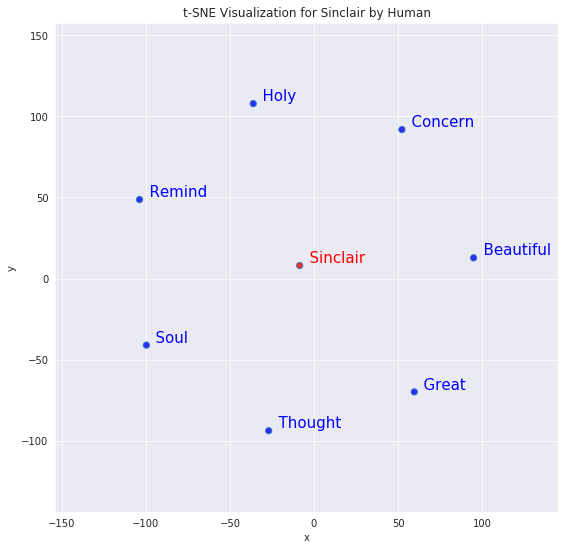

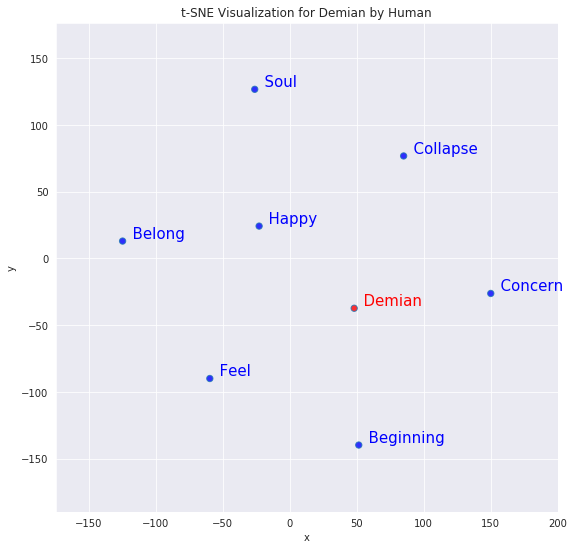

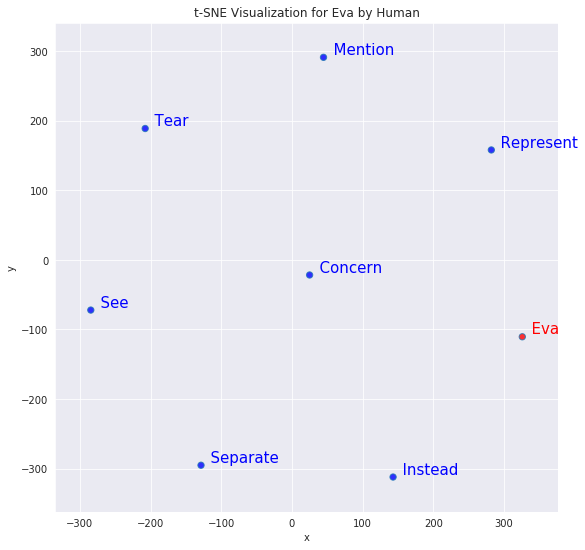

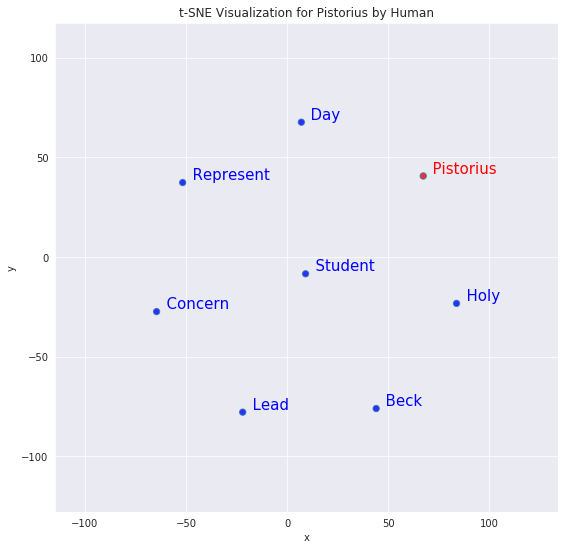

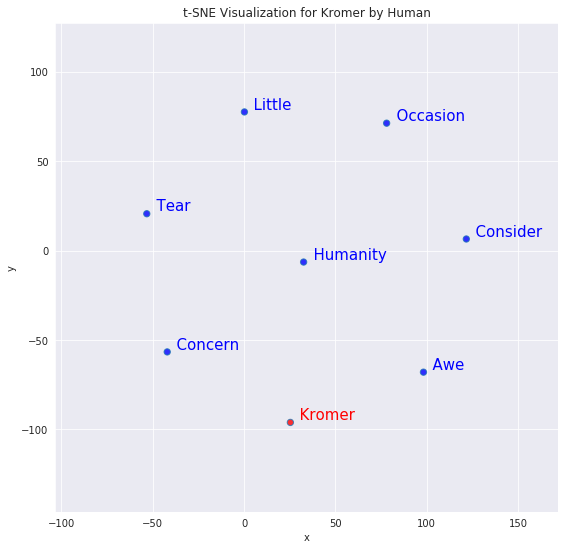

In [0]:
tsnescatterplot_1(w2v_model_Human, 'sinclair', possible_w_H, "Human")
tsnescatterplot_1(w2v_model_Human, 'demian', possible_w_H, "Human")
tsnescatterplot_1(w2v_model_Human, 'eva', possible_w_H, "Human")
tsnescatterplot_1(w2v_model_Human, 'pistorius', possible_w_H, "Human")
tsnescatterplot_1(w2v_model_Human, 'kromer', possible_w_H, "Human")

In [0]:
# Function Definition for t-sne
def tsnescatterplot_2(model, word, list_names, who):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # Calculate the most similar words
    similarity = {}
    for words in list_names:
      if words in model.wv.vocab:
        similarity[words] = model.wv.similarity(word, words)
       
    print(similarity)
    print(sorted(similarity.items(), key = lambda kv:(kv[1], kv[0]), reverse = True))
    sorted_sim = sorted(similarity.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)
    final_sim = []
    other_words = []
    i = 0
    
    for k, v in sorted_sim:
      if i <5:
        final_sim.append(k)
      else:
        other_words.append(k)
      i+=1
        

    print(final_sim)
    # adds the vector for each of the closest words to the array
    for wrd in final_sim:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd) # 단어구나
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
          
          
#     for wrd in other_words:
#           wrd_vector = model.wv.__getitem__([wrd])
#           word_labels.append(" ")
#           color_list.append('grey')
#           arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=5).fit_transform(arrays)
    #reduc = PCA().fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=10, perplexity=10).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(10, 10)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
   
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

   
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
           
    plt.title('t-SNE Visualization for {}'.format(word.title())+" by "+who)

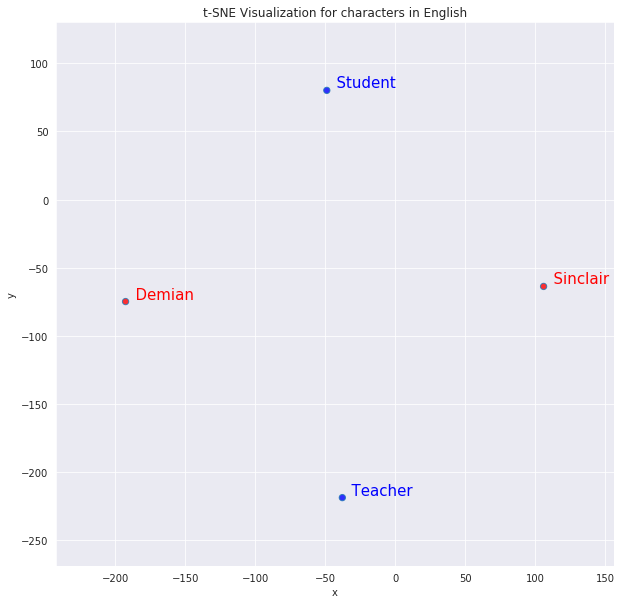

In [0]:
tsnescatterplot_3(w2v_model_Human, 'demian', 'teacher',  'sinclair', "student", 'beautiful', "English")


In [0]:
tsnescatterplot_2(w2v_model_Human, 'sinclair', possible_w_H, "Human")
tsnescatterplot_2(w2v_model_Human, 'demian', possible_w_H, "Human")
tsnescatterplot_2(w2v_model_Human, 'eva', possible_w_H, "Human")
tsnescatterplot_2(w2v_model_Human, 'pistorius', possible_w_H, "Human")
tsnescatterplot_2(w2v_model_Human, 'kromer', possible_w_H, "Human")


In [0]:
from random import randint

# Function Definition for t-sne
def tsnescatterplot_3(model, word1,word2, word3, word4, word5, who):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = []
    color_list = []
    word_labels.append(word1)
    color_list.append('red')
    arrays = np.append(arrays, model.wv.__getitem__([word1]), axis=0)
    
    word_labels.append(word2)
    color_list.append('blue')
    arrays = np.append(arrays, model.wv.__getitem__([word2]), axis=0)

    word_labels.append(word3)
    color_list.append('red')
    arrays = np.append(arrays, model.wv.__getitem__([word3]), axis=0)

    word_labels.append(word4)
    color_list.append('blue')
    arrays = np.append(arrays, model.wv.__getitem__([word4]), axis=0)

#     word_labels.append(word5)
#     color_list.append('blue')
#     arrays = np.append(arrays, model.wv.__getitem__([word5]), axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    #reduc = PCA(n_components=19).fit_transform(arrays)
    reduc = PCA(n_components = 3).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=5, perplexity=5).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(10, 10)
    
    
    
    df['x'][0] = df['x'][0]+randint(-40,0)
    df['y'][0] = df['y'][0]+randint(-100,-80)
    df['x'][1] = df['x'][1]+randint(-80,-20)
    df['y'][1] = df['y'][1]+randint(0,60)
    df['x'][2] = df['x'][2]+randint(-50,-30)
    df['y'][2] = df['y'][2]+randint(0,40)
    df['x'][3] = df['x'][3]+randint(50,100)
    df['y'][3] = df['y'][3]+randint(0,20)
#     df['x'][4] = df['x'][4]+random.randint(-50,50)
#     df['y'][4] = df['y'][4]+random.randint(-50,50)
    
    temp = df['words'][0]
    df['words'][0] = df['words'][3]
    df['words'][3] = temp
    
    temp_c = df['color'][0]
    df['color'][0] = df['color'][3]
    df['color'][3] = temp_c


    #df['words'][3] = "Schuler"
    
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
        p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

   
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
           
    plt.title('t-SNE Visualization for {}'.format("characters")+" in "+who)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


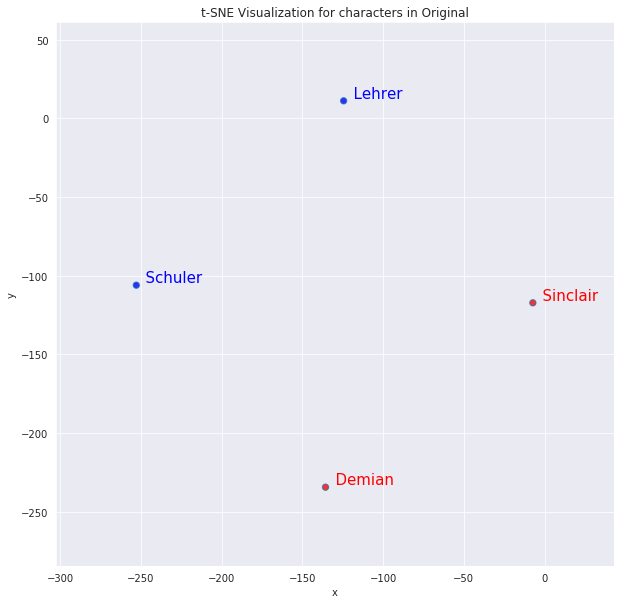

In [0]:
tsnescatterplot_3(w2v_model_Original, 'demian','lehrer', 'sinclair', 'sch_ler', 'schon', "Original")


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

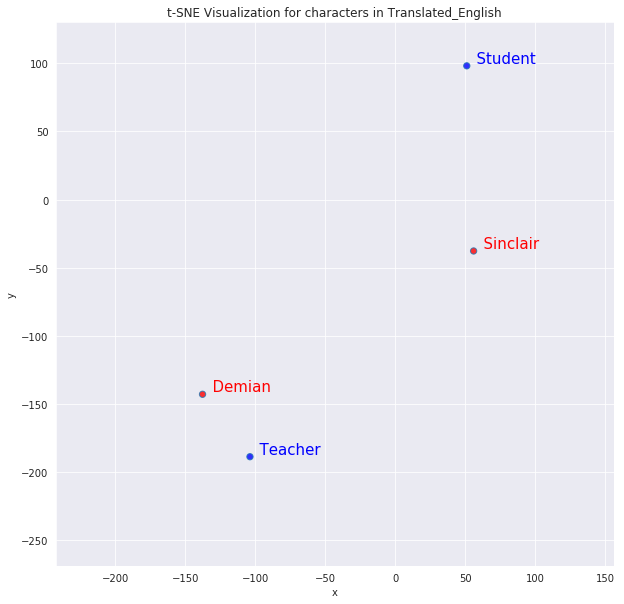

In [0]:
tsnescatterplot_3(w2v_model_Google, 'demian', 'teacher',  'sinclair', "student", 'beautiful',"Translated_English")


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

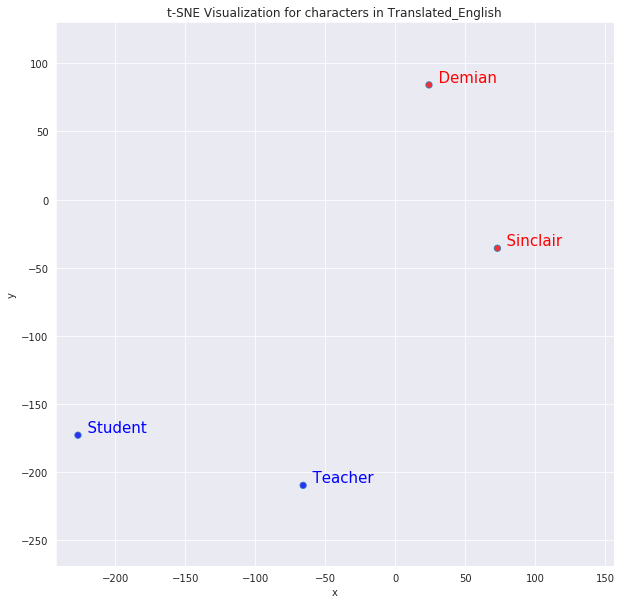

In [0]:
tsnescatterplot_3(w2v_model_Microsoft, 'demian', 'teacher',  'sinclair', "student", 'beautiful', "Translated_English")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

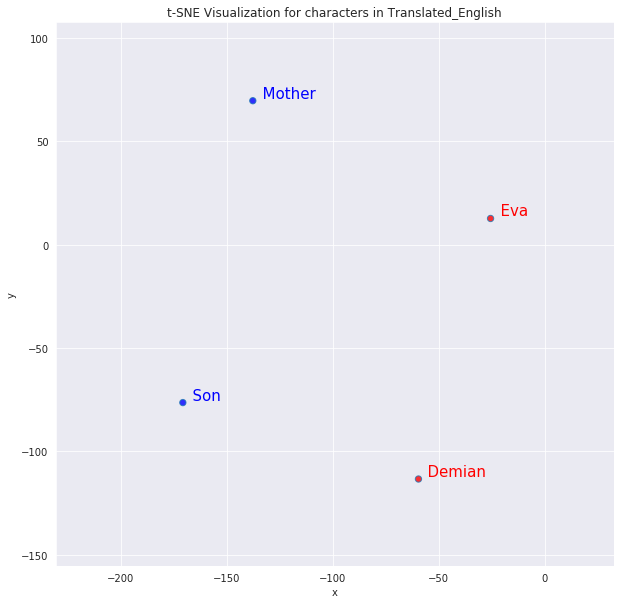

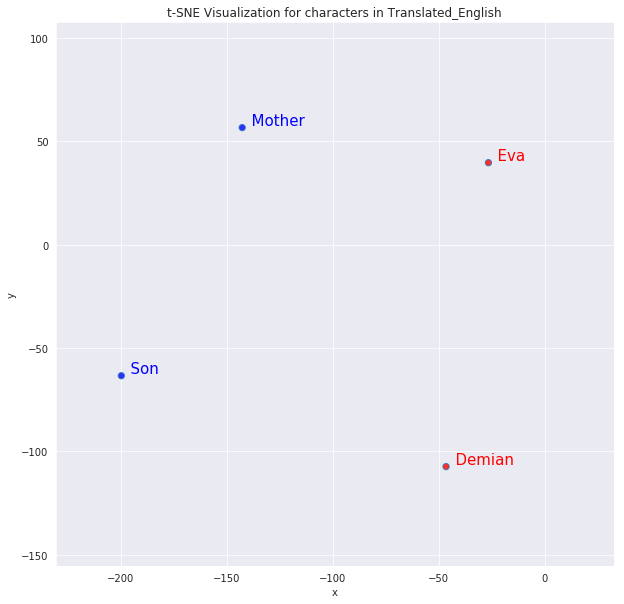

In [0]:
tsnescatterplot_3(w2v_model_Google, 'demian', 'eva',  'son', "mother", 'beautiful',"Translated_English")
tsnescatterplot_3(w2v_model_Microsoft, 'demian', 'eva',  'son', "mother", 'beautiful', "Translated_English")

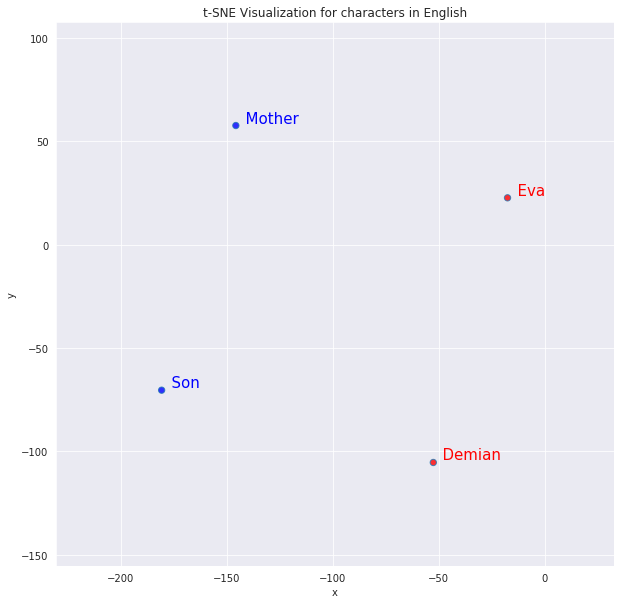

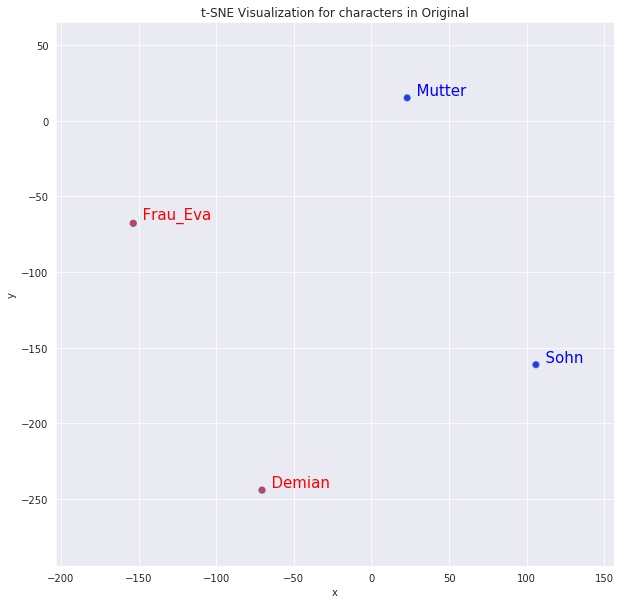

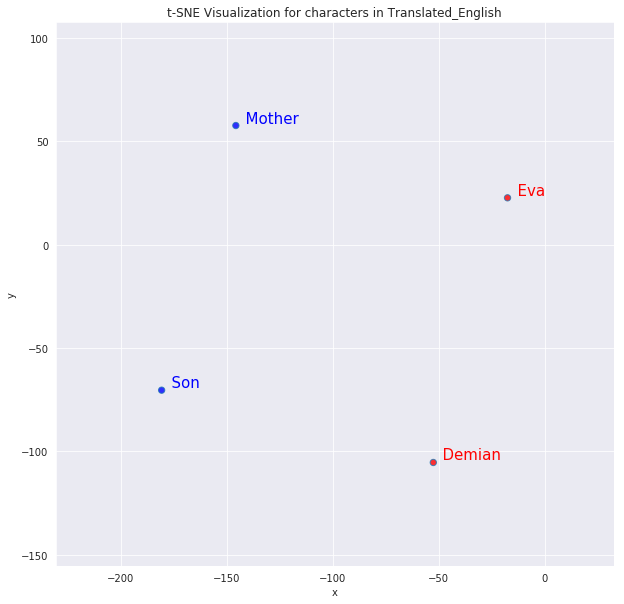

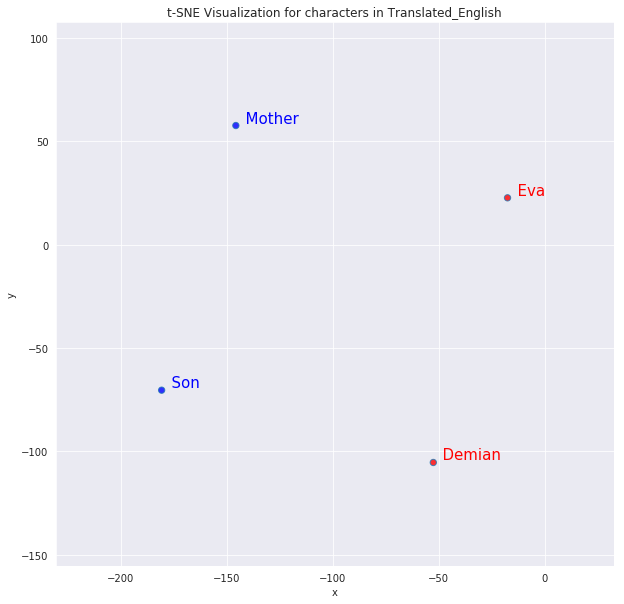

In [0]:
tsnescatterplot_3(w2v_model_Human, 'demian', 'eva',  'son', "mother", 'beautiful', "English")
tsnescatterplot_3(w2v_model_Original, 'demian','frau_eva', 'sohn', 'mutter', 'schon', "Original")
tsnescatterplot_3(w2v_model_Google, 'demian', 'eva',  'son', "mother", 'beautiful',"Translated_English")
tsnescatterplot_3(w2v_model_Microsoft, 'demian', 'eva',  'son', "mother", 'beautiful', "Translated_English")

In [0]:
tsnescatterplot_3(w2v_model_Original, 'frau_eva', 'mutter', 'demian', 'sohn', 'schon', "Original")
tsnescatterplot_3(w2v_model_Google, 'eva',"mother", 'demian', 'son',  'beautiful',"Translated_English")
tsnescatterplot_3(w2v_model_Microsoft, 'eva',"mother", 'demian', 'son',  'beautiful', "Translated_English")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


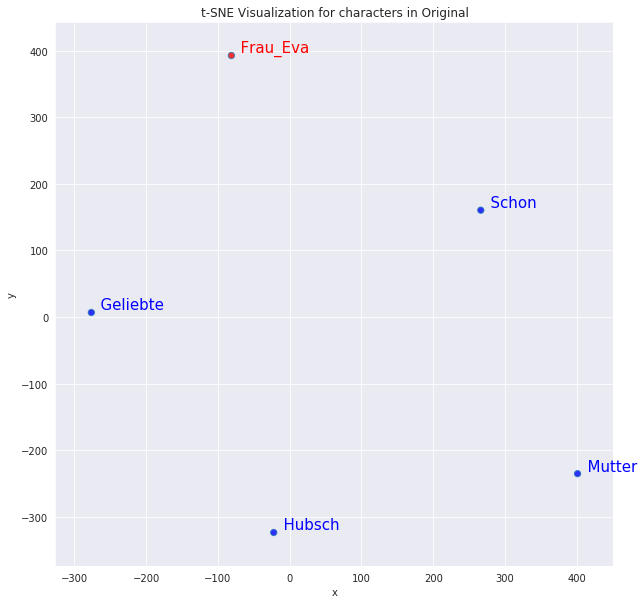

In [0]:
tsnescatterplot_3(w2v_model_Original, 'frau_eva', 'mutter', 'geliebte', 'h_bsch', 'schon', "Original")


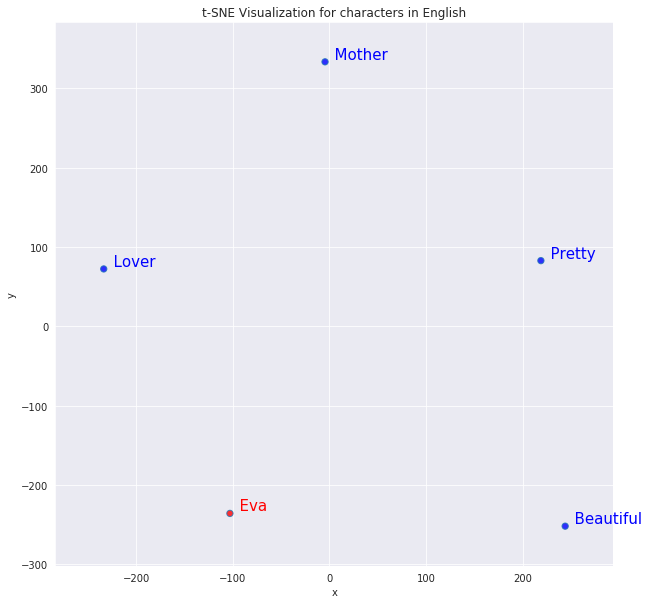

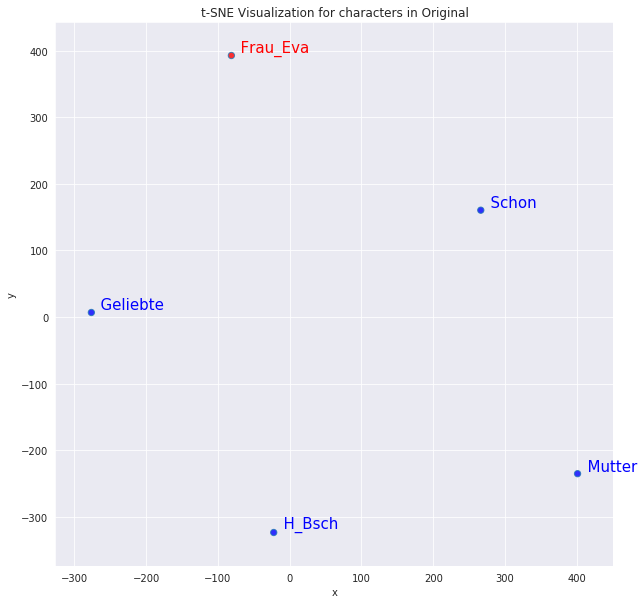

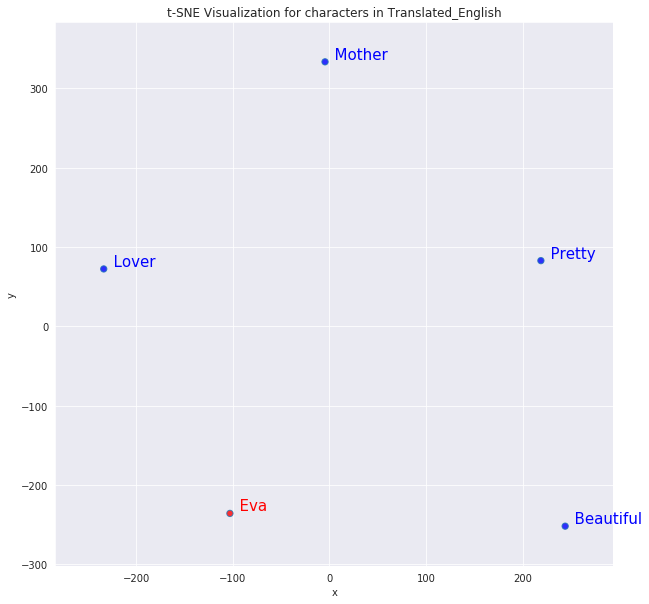

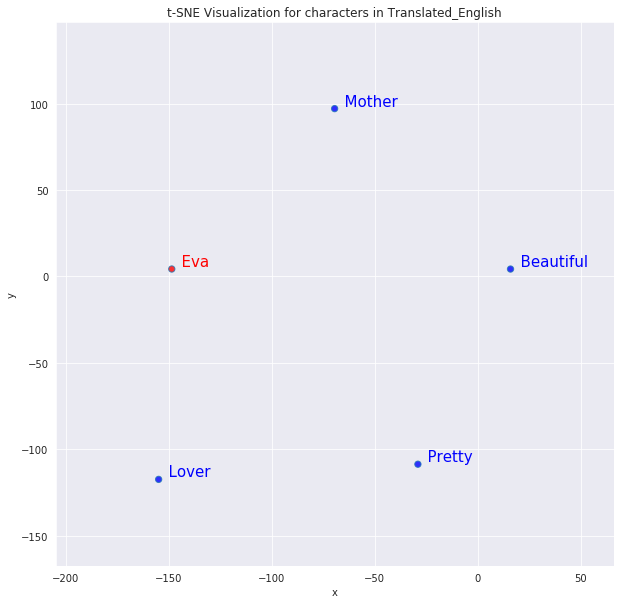

In [0]:
tsnescatterplot_3(w2v_model_Human, 'eva',"mother", 'lover', 'pretty', 'beautiful', "English")
tsnescatterplot_3(w2v_model_Original, 'frau_eva', 'mutter', 'geliebte', 'h_bsch', 'schon', "Original")
tsnescatterplot_3(w2v_model_Google, 'eva',"mother", 'lover', 'pretty', 'beautiful',"Translated_English")
tsnescatterplot_3(w2v_model_Microsoft, 'eva',"mother", 'lover', 'pretty', 'beautiful', "Translated_English")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


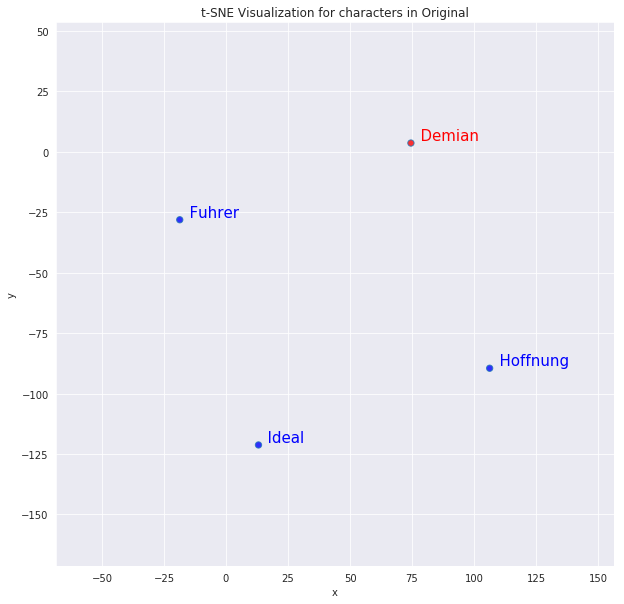

In [0]:
# tsnescatterplot_3(w2v_model_Human, 'demian', 'leader', 'ideal', 'hope', 'desire', "English")
# tsnescatterplot_3(w2v_model_Original, 'demian', 'f_hrer', 'ideal', 'hoffnung', 'verlangen', "Original")
tsnescatterplot_3(w2v_model_Original, 'demian', 'f_hrer', 'ideal', 'hoffnung', 'verlangen', "Original")
#tsnescatterplot_3(w2v_model_Google, 'demian', 'leader', 'ideal', 'hope', 'desire', "Translated_English")
#tsnescatterplot_3(w2v_model_Microsoft, 'demian', 'leader', 'ideal', 'hope', 'desire', "Translated_English")


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

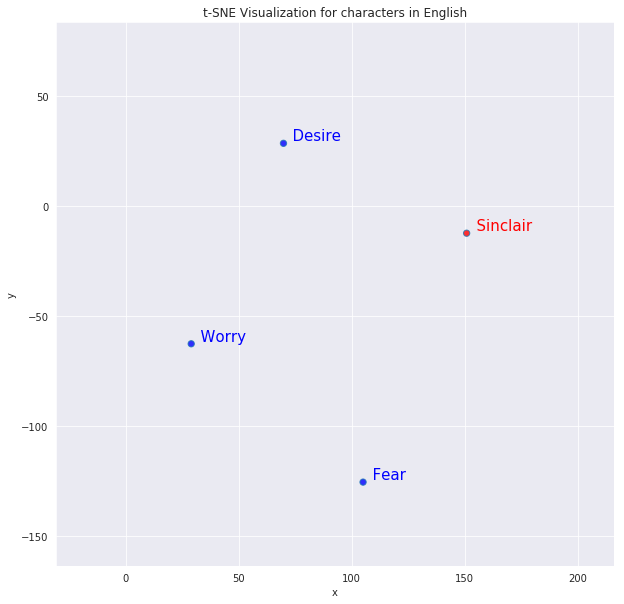

In [0]:
tsnescatterplot_3(w2v_model_Microsoft, 'sinclair', 'worry', 'fear', 'fate', 'desire', "English")


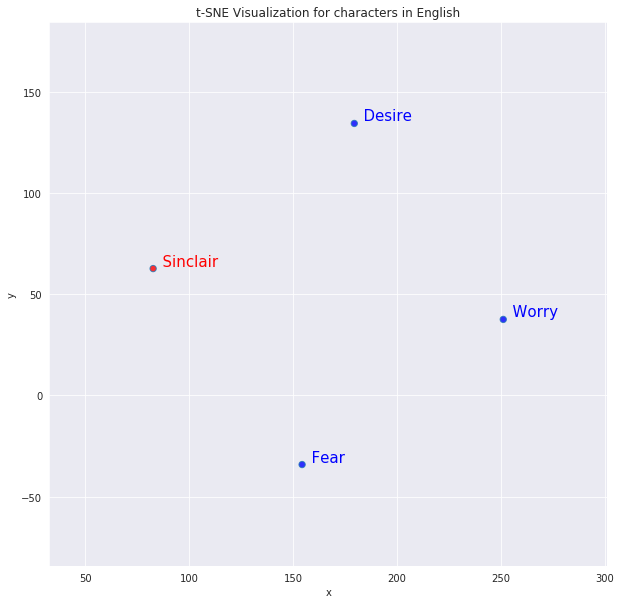

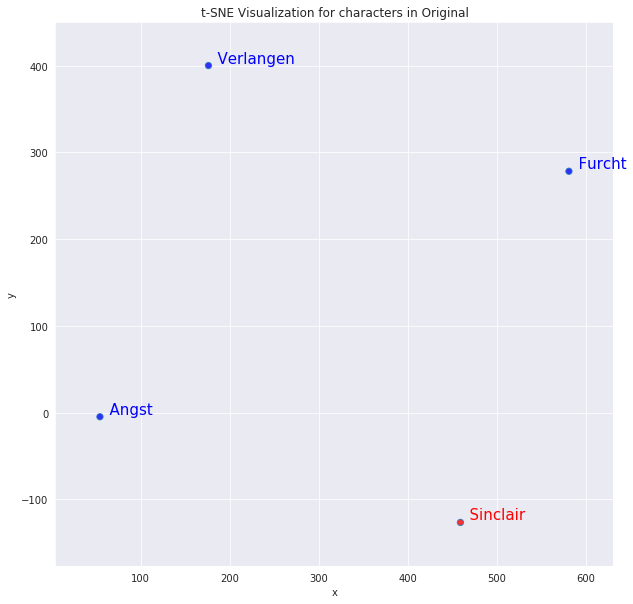

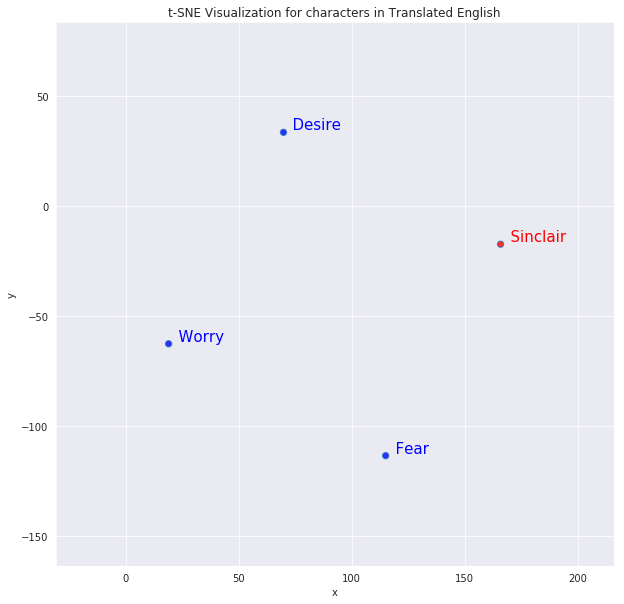

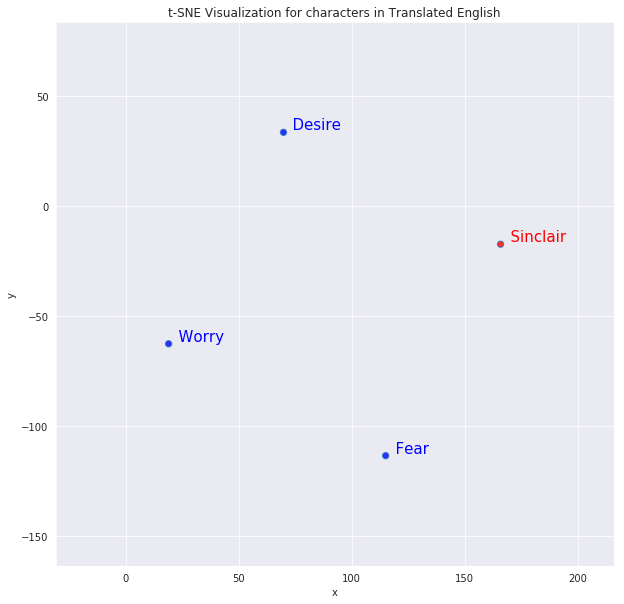

In [0]:
tsnescatterplot_3(w2v_model_Human, 'sinclair', 'worry', 'fear', 'fate', 'desire', "English")
tsnescatterplot_3(w2v_model_Original, 'sinclair', 'angst', 'furcht', 'schicksal', 'verlangen', "Original")
tsnescatterplot_3(w2v_model_Google, 'sinclair', 'worry', 'fear', 'fate', 'desire', "Translated English")
tsnescatterplot_3(w2v_model_Microsoft, 'sinclair', 'worry', 'fear', 'fate', 'desire', "Translated English")


In [0]:
# 

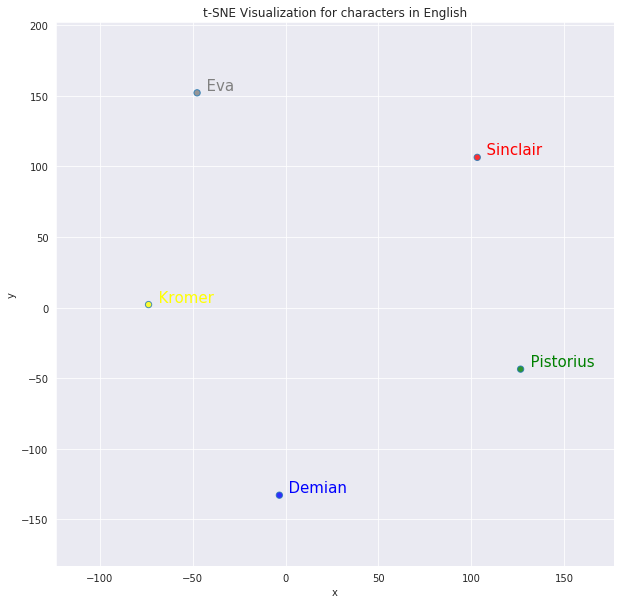

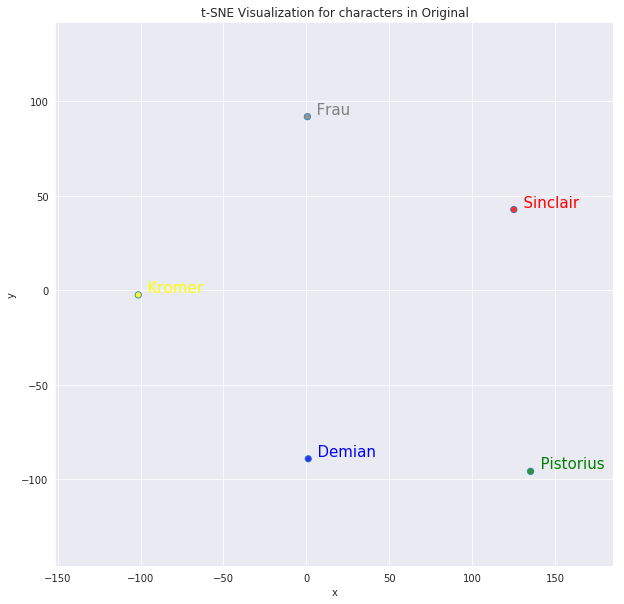

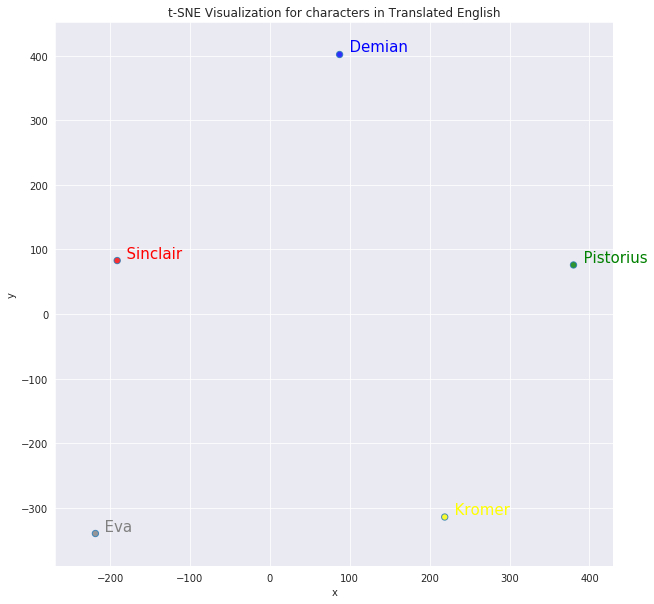

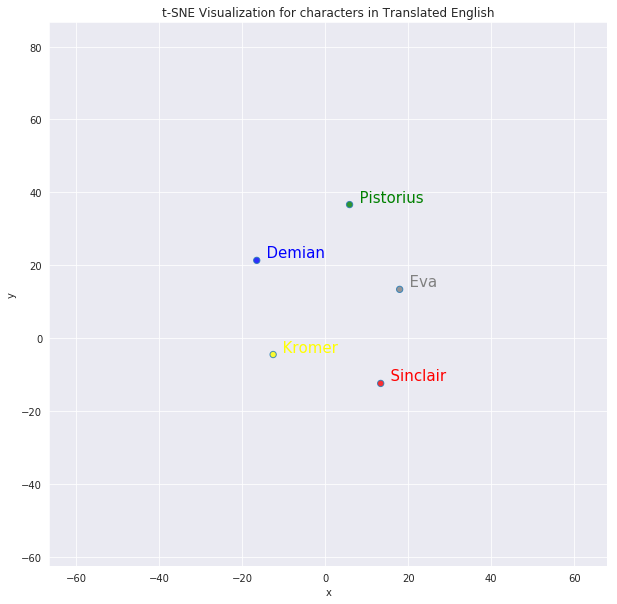

In [0]:
tsnescatterplot_3(w2v_model_Human, 'sinclair', 'demian', 'eva', 'kromer', 'pistorius', "English")
tsnescatterplot_3(w2v_model_Original, 'sinclair', 'demian', 'frau', 'kromer', 'pistorius', "Original")
tsnescatterplot_3(w2v_model_Google, 'sinclair', 'demian', 'eva', 'kromer', 'pistorius', "Translated English")
tsnescatterplot_3(w2v_model_Microsoft, 'sinclair', 'demian', 'eva', 'kromer', 'pistorius', "Translated English")

# tsnescatterplot_3(w2v_model_Human, 'sinclair', 'demian', 'eva', 'demian', 'pistorius', "English")
# tsnescatterplot_3(w2v_model_Original, 'sinclair', 'demian', 'frau', 'demian', 'pistorius', "Original")
# #tsnescatterplot_3(w2v_model_Google, 'sinclair', 'demian', 'mrs.eva', 'demian', 'pistorius', "Translated English")
# tsnescatterplot_3(w2v_model_Microsoft, 'sinclair', 'demian', 'eva', 'demian', 'pistorius', "Translated English")


In [0]:
for keys in w2v_model_Original.wv.vocab:
  print(keys)

# if ("eva" in w2v_model_Google.wv.vocab):
#   print(True)
# else:
#   print(False)

ich
wollte
ja
nicht
al
das
zu
leben
versuchen
von
selber
aus
mir
heraus
warum
war
sehr
schwer
um
meine
geschichte
erz_hlen
mu
weit
m
te
w
es
m_glich
noch
viel
weiter
zur_ck
gehen
bis
die
jahre
meiner
kindheit
und
ber
sie
hinaus
dicht
wenn
tun
seien
gott
k
irgendeine
ganz
gar
wie
sich_selber
erz_hlte
ohne
alle
berall
kann
wenig
k_nnen
aber
ist
denn
meine_eigene
eine
menschen
glichen
oder
sondern
wirklichen
ein
wirklich
mensch
wei
man
heute
weniger
jemal
t
auch
deren
jeder
versuch
der_natur
tot
ren
wir
mehr
k_nnte
jeden
un
mit
einer
der
welt
h_tte
keinen
sinn
geschichten
nur
er
jedem
wichtige
merkw
rdige
punkt
wo
sich
einmal
nie
wieder
darum
jede
wichtig
g
den
willen
erf
llt
wunderbar
aufmerksamkeit
geist
gestalt
geworden
wird
erl
wissen
viele
f_hlen
sterben
werde
diese
einen
darf
mich
bin
suche
nicht_mehr
auf
b
h_ren
mein
s
nach
traum
aller
gen
wollen
weg
hin
wege
kein
selbst
gewesen
dennoch
werden
tr
gt
seiner
bis_zum
ende
niemal
bleibt
oben
unten
wurf
dem
allen
sind
tter
komman
tiefen

In [0]:
# Function Definition for t-sne
def tsnescatterplot_all(model, word1,word2, word3,word4,word5, who):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = []
    color_list = []

    for words in model.wv.vocab:
#       if (words == word1 or words==word2 or words == word3 or words == word4 or words==word5):
#         word_labels.append(words)
#         color_list.append("red")
#         arrays = np.append(arrays, model.wv.__getitem__([words]), axis=0)

        
#       else:
        word_labels.append(" ")
        color_list.append("grey")
        arrays = np.append(arrays, model.wv.__getitem__([words]), axis=0)
    
#     word_labels.append(word1)
#     color_list.append('red')
#     arrays = np.append(arrays, model.wv.__getitem__([word1]), axis=0)

    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    #reduc = PCA(n_components=19).fit_transform(arrays)
    reduc = PCA().fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=10, perplexity=5).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(10, 10)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
   
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

   
    plt.xlim(Y[:, 0].min()-5, Y[:, 0].max()+5)
    plt.ylim(Y[:, 1].min()-5, Y[:, 1].max()+5)
           
    plt.title('t-SNE Visualization for {}'.format(word1.title())+" by "+who)

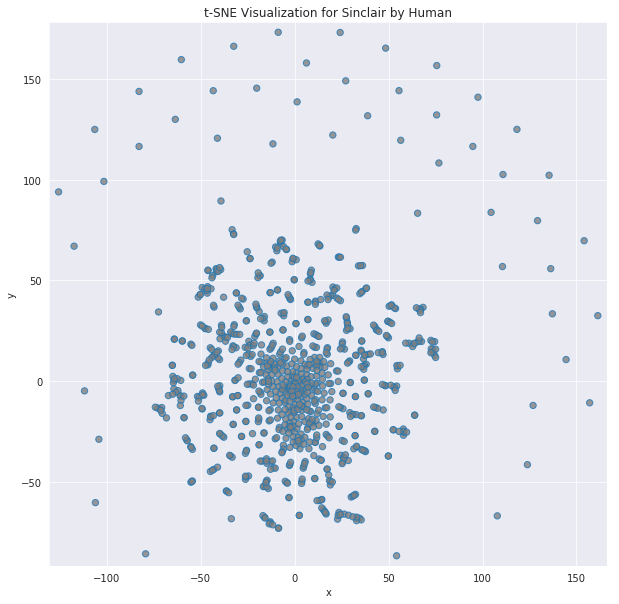

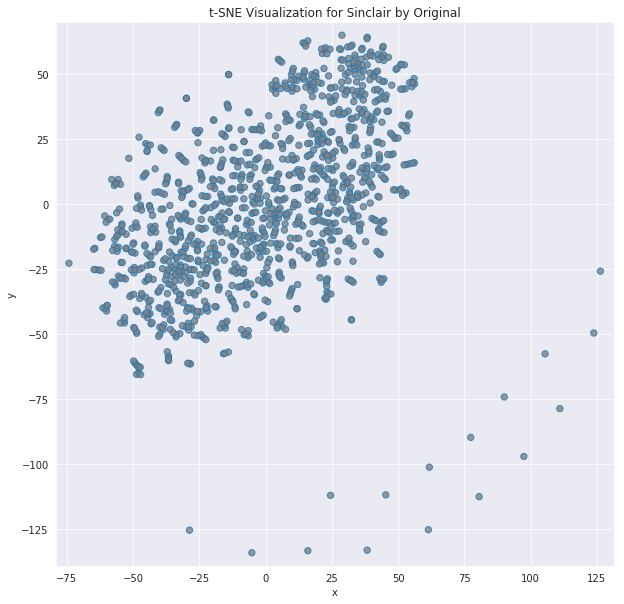

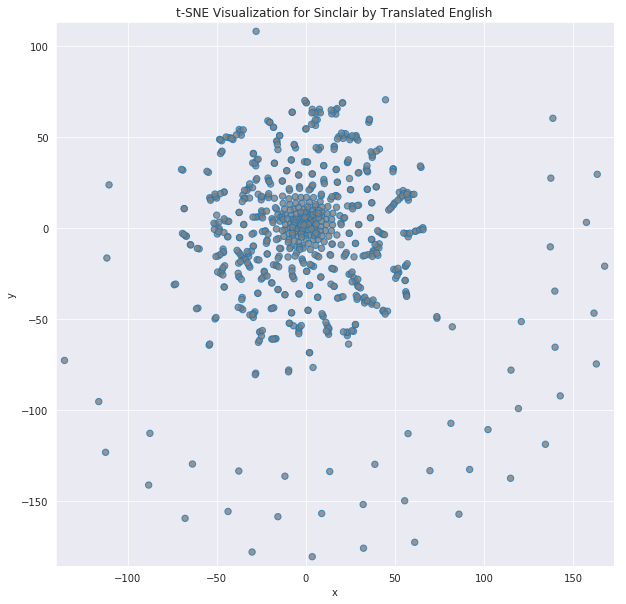

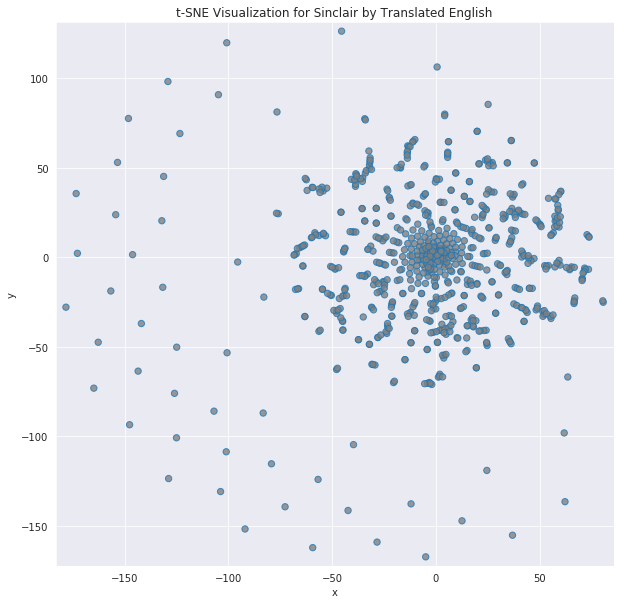

In [0]:
tsnescatterplot_all(w2v_model_Human, 'sinclair','demian','eva','pistorius','kromer', "Human")
tsnescatterplot_all(w2v_model_Original, 'sinclair', 'demian', 'frau', 'kromer', 'pistorius', "Original")
tsnescatterplot_all(w2v_model_Google, 'sinclair', 'demian', 'eva', 'kromer', 'pistorius', "Translated English")
tsnescatterplot_all(w2v_model_Microsoft, 'sinclair', 'demian', 'eva', 'kromer', 'pistorius', "Translated English")


In [0]:
tsnescatterplot(w2v_model_Human, 'sinclair', [i[0] for i in w2v_model_Human.wv.most_similar(negative=["sinclair"])], "Human")
# tsnescatterplot(w2v_model_Human, 'demian', [i[0] for i in w2v_model_Human.wv.most_similar(negative=["demian"])], "Human")
# tsnescatterplot(w2v_model_Human, 'eva', [i[0] for i in w2v_model_Human.wv.most_similar(negative=["eva"])], "Human")

In [0]:
tsnescatterplot(w2v_model_DeepL, 'sinclair', [i[0] for i in w2v_model_DeepL.wv.most_similar(negative=["sinclair"])], "DeepL")
tsnescatterplot(w2v_model_DeepL, 'demian', [i[0] for i in w2v_model_DeepL.wv.most_similar(negative=["demian"])], "DeepL")
tsnescatterplot(w2v_model_DeepL, 'eva', [i[0] for i in w2v_model_DeepL.wv.most_similar(negative=["eva"])], "DeepL")

In [0]:
tsnescatterplot(w2v_model_Google, 'sinclair', [i[0] for i in w2v_model_Google.wv.most_similar(negative=["sinclair"])], "Google")
tsnescatterplot(w2v_model_Google, 'demian', [i[0] for i in w2v_model_Google.wv.most_similar(negative=["demian"])], "Google")
tsnescatterplot(w2v_model_Google, 'eva', [i[0] for i in w2v_model_Google.wv.most_similar(negative=["eva"])], "Google")

In [0]:
tsnescatterplot(w2v_model_Microsoft, 'sinclair', [i[0] for i in w2v_model_Microsoft.wv.most_similar(negative=["sinclair"])], "Microsoft")
tsnescatterplot(w2v_model_Microsoft, 'demian', [i[0] for i in w2v_model_Microsoft.wv.most_similar(negative=["demian"])], "Microsoft")
tsnescatterplot(w2v_model_Microsoft, 'eva', [i[0] for i in w2v_model_Microsoft.wv.most_similar(negative=["eva"])], "Microsoft")

In [0]:
tsnescatterplot(w2v_model_Papago, 'sinclair', [i[0] for i in w2v_model_Papago.wv.most_similar(negative=["sinclair"])], "Papago")
tsnescatterplot(w2v_model_Papago, 'demian', [i[0] for i in w2v_model_Papago.wv.most_similar(negative=["demian"])], "Papago")
tsnescatterplot(w2v_model_Papago, 'eva', [i[0] for i in w2v_model_Papago.wv.most_similar(negative=["eva"])], "Papago")

In [0]:
# New Embeddings
words_demian = []
embeddings_demian = []
for word in list(w2v_model_Human.wv.vocab):
    embeddings_demian.append(w2v_model_Human.wv[word])
    words_demian.append(word)

In [0]:
tsne_demian_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=5000, random_state=32)
embeddings_demian_2d = tsne_demian_2d.fit_transform(embeddings_demian)

In [0]:
tsne_demian_3d = TSNE(perplexity=30, n_components=3, init='pca', n_iter=3500, random_state=12)
embeddings_demian_3d = tsne_demian_3d.fit_transform(embeddings_demian)

In [0]:
from mpl_toolkits.mplot3d import Axes3D


def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    name = label +".png"
    plt.savefig(name, format='png', dpi=150, bbox_inches='tight')
    plt.show()




def tsne_plot_3d(title, label, embeddings, a=1):
    fig = plt.figure()
    ax = Axes3D(fig)
    colors = cm.rainbow(np.linspace(0, 1, 1))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=colors, alpha=a, label=label)
    plt.legend(loc=4)
    plt.title(title)
    plt.show()

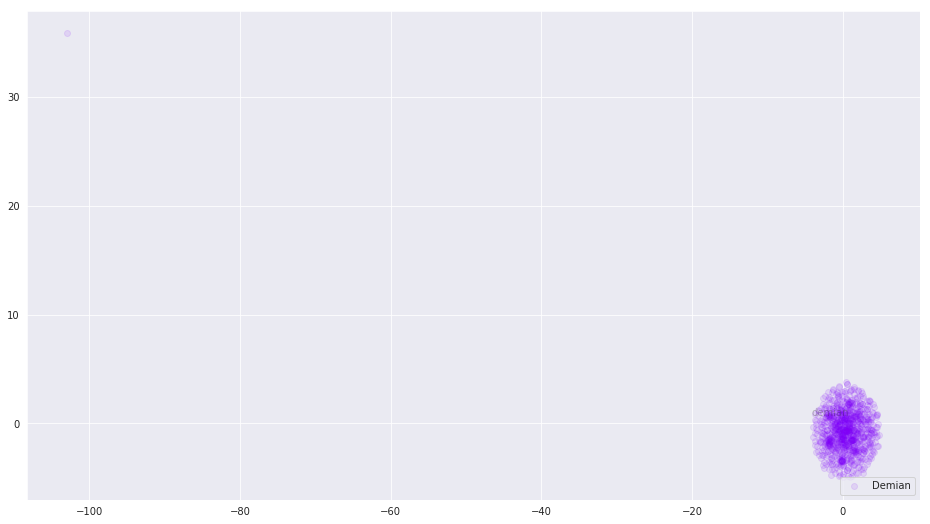

In [0]:
tsne_plot_2d('Demian', embeddings_demian_2d, ["demian"], a=0.1)


/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


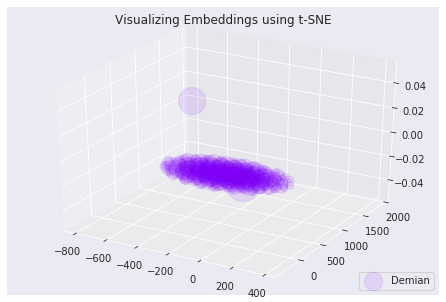

In [0]:
tsne_plot_3d('Visualizing Embeddings using t-SNE', 'Demian', embeddings_demian_3d, a=0.1)